In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import Data sets for practice 

geo_data = pd.read_excel("awesome-chocolates-data.xlsx", sheet_name = "geo" )
sales_data = pd.read_excel("awesome-chocolates-data.xlsx", sheet_name = "sales" )
people_data = pd.read_excel("awesome-chocolates-data.xlsx", sheet_name = "people" )
products_data = pd.read_excel("awesome-chocolates-data.xlsx", sheet_name = "products" )
print(geo_data.head())
print(sales_data.head())
print(people_data.head())
print(products_data.head())

  GeoID          Geo    Region
0    G1        India      APAC
1    G2          USA  Americas
2    G3       Canada  Americas
3    G4  New Zealand      APAC
4    G5    Australia      APAC
   SPID GeoID  PID   SaleDate  Amount  Customers  Boxes
0  SP01    G4  P04 2021-01-01    8414        276    495
1  SP02    G3  P14 2021-01-01     532        317     54
2  SP12    G2  P08 2021-01-01    5376        178    269
3  SP01    G4  P15 2021-01-01     259         32     22
4  SP19    G2  P18 2021-01-01    5530          4    179
           Salesperson  SPID     Team   Location
0         Barr Faughny  SP01  Yummies  Hyderabad
1  Dennison Crosswaite  SP02  Yummies  Hyderabad
2      Gunar Cockshoot  SP03  Yummies  Hyderabad
3       Wilone O'Kielt  SP04   Delish  Hyderabad
4         Gigi Bohling  SP05   Delish  Hyderabad
   PID          Product Category   Size  Cost_per_box
0  P01        Milk Bars     Bars  LARGE          1.52
1  P02   50% Dark Bites    Bites  LARGE          2.57
2  P03     Almond Choc

# Question: Write Python code to load a datartset using the pandas library and display the first five rows.

In [1]:

data = pd.read_csv("D:/Shiva Data Science/Main DS/Files/breast_cancer.csv", encoding='latin1')
data.head(5)

,Unnamed: 0,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,5,1,1,1,2,1,3,1,1,benign
1,2,5,4,4,5,7,10,3,2,1,benign
2,3,3,1,1,1,2,2,3,1,1,benign
3,4,6,8,8,1,3,4,3,7,1,benign
4,5,4,1,1,3,2,1,3,1,1,benign


In [2]:
data.isnull().sum()

Unnamed: 0         0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [3]:
data[data["Class"]!=0].sum()

Unnamed: 0                                                    240659
Cl.thickness                                                    3034
Cell.size                                                       2152
Cell.shape                                                      2196
Marg.adhesion                                                   1933
Epith.c.size                                                    2209
Bare.nuclei                                                     2421
Bl.cromatin                                                     2353
Normal.nucleoli                                                 1960
Mitoses                                                         1095
Class              benignbenignbenignbenignbenignmalignantbenignb...
dtype: object

In [4]:
X = data.drop("Class",axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
Y = LabelEncoder.fit_transform(data["Class"])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [8]:
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [9]:
Y_pred = model.predict(X_test)

In [10]:
Accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy_Score-",Accuracy.round(3)*100,"%")

Accuracy_Score- 95.6 %


# Question: Write Python code to perform one-hot encoding on a categorical variable 'Color' in a pandas DataFrame.

In [11]:
One_Hot_encoder_data = pd.get_dummies(data ,columns=["Class"])
One_Hot_encoder_data.head(5)

,Unnamed: 0,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class_benign,Class_malignant
0,1,5,1,1,1,2,1,3,1,1,1,0
1,2,5,4,4,5,7,10,3,2,1,1,0
2,3,3,1,1,1,2,2,3,1,1,1,0
3,4,6,8,8,1,3,4,3,7,1,1,0
4,5,4,1,1,3,2,1,3,1,1,1,0


## Question: Given a dataset of house prices, implement a decision tree regression model using scikit-learn and evaluate its performance using Mean Squared Error (MSE).

In [12]:
Data = pd.read_csv("D:/Shiva Data Science/Main DS/Files/Company_incentives.csv")
Data.head(5)

,Age,Education,MaritalStatus,Race,Gender,Country,Incentives
0,39,Bachelors,Never-married,White,Male,United-States,77516
1,50,Bachelors,Married,White,Male,United-States,83311
2,38,HS-grad,Divorced,White,Male,United-States,215646
3,28,Bachelors,Married,Black,Female,Cuba,338409
4,37,Masters,Married,White,Female,United-States,284582


In [13]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

Col_Names  = ["Education","MaritalStatus","Race","Gender","Country"]

for Col in Col_Names:
    Data[Col] = LabelEncoder.fit_transform(Data[Col])

In [14]:
x = Data.drop("Incentives",axis=1)
x.head(5)

,Age,Education,MaritalStatus,Race,Gender,Country
0,39,2,1,4,1,20
1,50,2,4,4,1,20
2,38,4,0,4,1,20
3,28,2,4,2,0,3
4,37,5,4,4,0,20


In [15]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
x  = MM.fit_transform(x)
x = pd.DataFrame(x)
x.head(5)

,0,1,2,3,4,5
0,0.484848,0.250,0.25,1.0,1.0,1.00
1,0.818182,0.250,1.00,1.0,1.0,1.00
2,0.454545,0.500,0.00,1.0,1.0,1.00
3,0.151515,0.250,1.00,0.5,0.0,0.15
4,0.424242,0.625,1.00,1.0,0.0,1.00


In [16]:
y = Data["Incentives"]
y.head(5)

0     77516
1     83311
2    215646
3    338409
4    284582
Name: Incentives, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [18]:
import numpy as np
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
Rmse =np.sqrt(mean_squared_error(Y_test,Y_pred))
Rmse.round(2)

129223.18

### Question: Write Python code to perform K-Means clustering on a dataset using the scikit-learn library.

In [19]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(x)
Kmean_labels =Kmeans.labels_
x["Cluster"]= pd.DataFrame(Kmean_labels, columns=["Cluster"])
x.head(5)                             

C:\Users\91879\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91879\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,0,1,2,3,4,5,Cluster
0,0.484848,0.250,0.25,1.0,1.0,1.00,2
1,0.818182,0.250,1.00,1.0,1.0,1.00,1
2,0.454545,0.500,0.00,1.0,1.0,1.00,2
3,0.151515,0.250,1.00,0.5,0.0,0.15,0
4,0.424242,0.625,1.00,1.0,0.0,1.00,0


# Question: Implement k-nearest neighbors (KNN) classification in Python using the scikit-learn library. Provide code and an example dataset.

In [20]:
# Example dataset
xx = [[1, 2], [2, 3], [3, 4], [4, 5]]
yy = [0, 1, 0, 1]

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
model = knn.fit(xx,yy)

y_pred = model.predict([[6, 3]])
y_pred

array([1])

### Question: Write Python code to perform stratified sampling on a dataset for a classification problem. Why is stratified sampling important?

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=42 )
X_train,X_test,Y_train,Y_test

(            0      1     2     3    4    5  Cluster
 357  0.424242  1.000  1.00  1.00  1.0  1.0        1
 647  0.242424  0.000  0.00  0.00  0.0  1.0        0
 291  0.000000  0.500  0.25  1.00  1.0  0.2        2
 420  0.121212  0.250  0.25  1.00  0.0  1.0        0
 177  0.575758  0.500  1.00  0.25  1.0  0.0        1
 ..        ...    ...   ...   ...  ...  ...      ...
 71   0.727273  0.625  0.25  1.00  0.0  1.0        0
 106  0.333333  0.500  0.25  1.00  0.0  1.0        0
 270  0.666667  1.000  0.00  1.00  0.0  1.0        0
 435  0.212121  0.250  1.00  0.50  0.0  1.0        0
 102  0.242424  0.500  0.25  0.50  0.0  1.0        0
 
 [488 rows x 7 columns],
             0      1     2     3    4    5  Cluster
 158  0.242424  1.000  1.00  1.00  1.0  1.0        1
 499  0.969697  1.000  0.00  0.25  0.0  1.0        0
 396  0.393939  0.000  0.00  1.00  0.0  1.0        0
 155  0.818182  0.000  0.00  1.00  0.0  1.0        0
 321  0.787879  0.625  1.00  1.00  1.0  1.0        1
 ..        ...    .

In [23]:
Date_data = pd.DataFrame({
    'datetime_column': ['2023-08-28 10:15:00', '2023-08-28 15:30:00', '2023-08-29 09:45:00']})
Date_data["datetime_column"] = pd.to_datetime(Date_data["datetime_column"])
Date_data

,datetime_column
0,2023-08-28 10:15:00
1,2023-08-28 15:30:00
2,2023-08-29 09:45:00


In [24]:
Date_data["Day_of_week"] = Date_data["datetime_column"].dt.weekofyear
Date_data["hour"]= Date_data["datetime_column"].dt.hour
Date_data

C:\Users\91879\AppData\Local\Temp\ipykernel_5784\1172808793.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Date_data["Day_of_week"] = Date_data["datetime_column"].dt.weekofyear


,datetime_column,Day_of_week,hour
0,2023-08-28 10:15:00,35,10
1,2023-08-28 15:30:00,35,15
2,2023-08-29 09:45:00,35,9


# Question: In a dataset of customer reviews, you want to extract sentiment as a feature. Explain how you can perform sentiment analysis using Python, and provide an example of how to calculate sentiment scores for reviews.

In [25]:
from textblob import TextBlob

Review = "I love this product, Its very good"

sentiment = TextBlob(Review).sentiment

print("Polarity: ",sentiment.polarity)
print("Subjectivity: ",sentiment.subjectivity)

Polarity:  0.705
Subjectivity:  0.6900000000000001


# Question: Implement a simple linear regression model in Python using the scikit-learn library. Provide code and an example dataset.

In [26]:
from sklearn.linear_model import LinearRegression 

x = Data[["Age"]]
y = Data["Incentives"]

LR = LinearRegression()

model = LR.fit(x,y)
y_pred = model.predict([[88]])
y_pred


C:\Users\91879\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([161038.08622702])

# Question: You are working with a time-series dataset. Explain the concept of rolling statistics and provide an example of how to calculate a rolling mean for a time-series.

In [27]:
# # Sample time-series data
# data = pd.DataFrame({'value': [10, 15, 20, 25, 30, 35, 40]})

# data["Rolling_mean"] = data["value"].rolling(window=3).mean()

# Rolling_mean
# data

In [28]:
length = float(input("length of rectangel: "))

width = float(input("width of rectangle: "))

area = length* width

print("Area of rectangle: ", area)

length of rectangel: 55
width of rectangle: 64
Area of rectangle:  3520.0


In [29]:
number = int(input("Enter a number: "))

if number % 2 == 0:
    print("Number is even")
else:
    print("Number is odd")

Enter a number: 65
Number is odd


In [30]:

Numbers = list(range(1,11))

for number in Numbers:
    print(number)

1
2
3
4
5
6
7
8
9
10


In [31]:
def factorial(n):
    if n==0 or n==1:
        return 1
    else:
        return n * factorial(n-1)
    
print (factorial(5))

120


In [32]:
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [33]:
def prime_no(n):
    for i in range (2,int(n**0.5)+1):
        if n % i == 0:
            return False
    return True   

Primes = []
for i in range(2,101):
    if prime_no(i):
        Primes.append(i)

print(Primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [34]:
def is_prime(n):
  """Returns True if n is a prime number, False otherwise."""
  for i in range(2, int(n**0.5) + 1):
    if n % i == 0:
      return False
  return True


primes = []
for i in range(2, 101):
  if is_prime(i):
    primes.append(i)

print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [35]:
age = 25
print("Iam",age,"years old")

Iam 25 years old


In [36]:
age = 24
print("Iam",age,"years old")

Iam 24 years old


In [37]:
#convert km to miles

km = float(input("Type the no. of km: "))
miles = km / 1.609344
print(km, "km = ", round(miles,3) ,"miles")

Type the no. of km: 22
22.0 km =  13.67 miles


In [38]:

myString = "Some text"
type(myString)

str

In [39]:
myString = 'he said "meet me"'

print(myString)

he said "meet me"


In [40]:
print(myString[0])
print(myString[-1])

h
"


In [41]:
len(myString)

17

In [42]:
myString = "IND784874387783"
myString[0:3]

'IND'

In [43]:
myString = "784874387783IND"
myString[-3:]
print(myString[-8:])

87783IND


In [44]:
#Concatenate
"Hello"+ " "+ "world"

'Hello world'

In [45]:
"user-" + str(22)

'user-22'

In [46]:
num1 = 11
num2 = 77
print(type(num1))

result = num1 / num2
print(result)
print(type(result))

<class 'int'>
0.14285714285714285
<class 'float'>


In [47]:
import math
math.factorial(num1)

39916800

In [48]:
math.ceil(result)

1

# Lists

In [52]:

fruits = ["apple", "banana", "cherry","mango"]
print(type(fruits))
print(fruits)

<class 'list'>
['apple', 'banana', 'cherry', 'mango']


In [53]:
len(fruits)

4

In [54]:
fruits[0]

'apple'

In [55]:
fruits[-1]

'mango'

In [56]:
#  mutable
fruits[-1] = "kiwi"
fruits

['apple', 'banana', 'cherry', 'kiwi']

In [57]:
fruits.append("kiwi")
fruits

['apple', 'banana', 'cherry', 'kiwi', 'kiwi']

In [58]:
fruits.pop()
fruits

['apple', 'banana', 'cherry', 'kiwi']

In [59]:
fruits.pop(2)
fruits

['apple', 'banana', 'kiwi']

In [60]:
fruits.insert(0, "mango")
fruits

['mango', 'apple', 'banana', 'kiwi']

In [61]:
fruits.remove("kiwi")
fruits

['mango', 'apple', 'banana']

In [62]:
fruits2 =["banana","guava"]
fruits2+fruits

['banana', 'guava', 'mango', 'apple', 'banana']

In [63]:
#Excercise

people_names = ["John Smith", "Mary Johnson", "Robert Davis", "Lisa Wilson", "Michael Lee", "Sarah Miller", "David Anderson", "Emily Taylor", "James Brown", "Jennifer Evans"]

user = input("Type your name: ")

people_names.append(user)
print("Here's the list: ", people_names)


Type your name: raju
Here's the list:  ['John Smith', 'Mary Johnson', 'Robert Davis', 'Lisa Wilson', 'Michael Lee', 'Sarah Miller', 'David Anderson', 'Emily Taylor', 'James Brown', 'Jennifer Evans', 'raju']


# Tuples

In [64]:
T = ("John", 25, "New York")
type(T)

tuple

In [65]:
T[0]

'John'

In [66]:
T

('John', 25, 'New York')

In [67]:
# T.add("kiwi")
# T 
# immutable

In [69]:
#excercise
months = ("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
Birthday = input("Type your birthday in the format DD-MM-YYYY ")

index = int (Birthday[3:5])-1
bd_month = months[index]

print("You were born in ", bd_month)


Type your birthday in the format DD-MM-YYYY 06-06-1998
You were born in  June


# Dictionary

In [70]:
person = {"first_name": "John","last_name": "Doe","age": 30,"city": "New York"}

In [71]:
person["dob"] = "14-01-1998"
person

{'first_name': 'John',
 'last_name': 'Doe',
 'age': 30,
 'city': 'New York',
 'dob': '14-01-1998'}

In [72]:
person["childrens"] = ["Ana","pan"]
person

{'first_name': 'John',
 'last_name': 'Doe',
 'age': 30,
 'city': 'New York',
 'dob': '14-01-1998',
 'childrens': ['Ana', 'pan']}

In [73]:
person["childrens"].append("jan")
person

{'first_name': 'John',
 'last_name': 'Doe',
 'age': 30,
 'city': 'New York',
 'dob': '14-01-1998',
 'childrens': ['Ana', 'pan', 'jan']}

In [74]:
person.get("childrens","invalid property")

['Ana', 'pan', 'jan']

In [75]:
person.get("Country","invalid property")

'invalid property'

In [76]:
person["first_name"]

'John'

In [77]:
keys = list(person.keys())
keys

['first_name', 'last_name', 'age', 'city', 'dob', 'childrens']

In [78]:
values = list(person.values())
values

['John', 'Doe', 30, 'New York', '14-01-1998', ['Ana', 'pan', 'jan']]

In [79]:
person

{'first_name': 'John',
 'last_name': 'Doe',
 'age': 30,
 'city': 'New York',
 'dob': '14-01-1998',
 'childrens': ['Ana', 'pan', 'jan']}

In [80]:
key = input("What inforemation you want to know about the person? ")

result = person.get(key,"That information is not available")

print(result)

What inforemation you want to know about the person? dob
14-01-1998


In [81]:
key = input("What inforemation you want to know about the person? ")

result = person.get(key,"That information is not available")

print(result)

What inforemation you want to know about the person? city
New York


In [82]:
key = input("What inforemation you want to know about the person? ")

result = person.get(key,"That information is not available")

print(result)

What inforemation you want to know about the person? country
That information is not available


In [83]:
key = input("What inforemation you want to know about the person? ").lower()

result = person.get(key,"That information is not available")

print(result)

What inforemation you want to know about the person? city
New York


In [84]:
key = input("What inforemation you want to know about the person? ")

result = person.get(key,"That information is not available")

print(result)

What inforemation you want to know about the person? age
30


In [85]:
key = input("What inforemation you want to know about the person? ").lower()

result = person.get(key,"That information is not available")

print(result)

What inforemation you want to know about the person? last_name
Doe


In [86]:
person.clear()
person

{}

# Booleans

In [87]:
Myboolean = True
type(Myboolean)

bool

In [88]:
num1 = 15
num2 = 19

In [89]:
num1 > num2

False

In [90]:
num1 < num2

True

In [91]:
num1 == num2

False

In [92]:
num1 != num2

True

In [93]:
num1 >= num2

False

In [94]:
num1 <= num2

True

In [96]:
num1 = float(input("Type the first number: "))
num2 = float(input("Type the first number: "))

if (num1 > num2):
    print(num1,"is greater than ",num2)
print("this is out of the if structure")

Type the first number: 12
Type the first number: 55
this is out of the if structure


In [97]:
num1 = float(input("Type the first number: "))
num2 = float(input("Type the first number: "))

if (num1 > num2):
    print(num1,"is greater than ",num2)
print("this is out of the if structure")

Type the first number: 55
Type the first number: 64
this is out of the if structure


In [98]:
num1 = float(input("Type the first number: "))
num2 = float(input("Type the first number: "))

if (num1 > num2):
    print(num1,"is greater than ",num2)
elif(num1 == num2):
    print(num1,"is equal to ",num2)
else:
    print(num1,"is less than ",num2)

Type the first number: 15
Type the first number: 62
15.0 is less than  62.0


In [99]:
num1 = float(input("Type the first number: "))
num2 = float(input("Type the first number: "))

if (num1 > num2):
    print(num1,"is greater than ",num2)
elif(num1 == num2):
    print(num1,"is equal to ",num2)
else:
    print(num1,"is less than ",num2)

Type the first number: 14
Type the first number: 98
14.0 is less than  98.0


In [100]:
my_age = 34

user_age = int(input("Type your age: "))

if (user_age > my_age):
    print("You are older than me")
elif (user_age == my_age):
    print("we are same age")
else:
    print("you are younge than me")

Type your age: 25
you are younge than me


In [101]:
my_age = 34

user_age = int(input("Type your age: "))

if (user_age > my_age):
    print("You are older than me")
elif (user_age == my_age):
    print("we are same age")
else:
    print("you are younge than me")

Type your age: 15
you are younge than me


In [102]:
grade1 = float(input("Type your grade in the first test: "))
grade2 = float(input("Type your grade in the second test: "))
grade3 = float(input("Type your grade in the third test: "))

absences = int(input("Type your number of absences: "))
total_classes = int(input("Type your total number of classes: "))

avg_grade = (grade1 + grade2 + grade3) / 3
attendance = (total_classes - absences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 60):
    if(attendance >= 0.8):
        print("You have been approved.")
    else:
        print("You are not approved due to an attenadnce rate lower than the 80%.")
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")

Type your grade in the first test: 89
Type your grade in the second test: 65
Type your grade in the third test: 41
Type your number of absences: 5
Type your total number of classes: 55
Average grade:  65.0
Attendance rate:  90.91
You have been approved.


In [103]:
grade1 = float(input("Type your grade in the first test: "))
grade2 = float(input("Type your grade in the second test: "))
grade3 = float(input("Type your grade in the third test: "))

absences = int(input("Type your number of absences: "))
total_classes = int(input("Type your total number of classes: "))

avg_grade = (grade1 + grade2 + grade3) / 3
attendance = (total_classes - absences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 60):
    if(attendance >= 0.8):
        print("You have been approved.")
    else:
        print("You are not approved due to an attenadnce rate lower than the 80%.")
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")

Type your grade in the first test: 55
Type your grade in the second test: 61
Type your grade in the third test: 42
Type your number of absences: 6
Type your total number of classes: 60
Average grade:  52.67
Attendance rate:  90.0
You are not approved due to an average grade lower than 60%.


# And - or Operators

In [104]:
grade1 = float(input("Type your grade in the first test: "))
grade2 = float(input("Type your grade in the second test: "))
grade3 = float(input("Type your grade in the third test: "))

absences = int(input("Type your number of absences: "))
total_classes = int(input("Type your total number of classes: "))

avg_grade = (grade1 + grade2 + grade3) / 3
attendance = (total_classes - absences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 60 and attendance >= 0.8):
    print("You have been approved.")
elif (avg_grade <= 60 and attendance <= 0.8):
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")   
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80%.")

Type your grade in the first test: 55
Type your grade in the second test: 69
Type your grade in the third test: 88
Type your number of absences: 55
Type your total number of classes: 66
Average grade:  70.67
Attendance rate:  16.67
You are not approved due to an attenadnce rate lower than the 80%.


In [105]:
grade1 = float(input("Type your grade in the first test: "))
grade2 = float(input("Type your grade in the second test: "))
grade3 = float(input("Type your grade in the third test: "))

absences = int(input("Type your number of absences: "))
total_classes = int(input("Type your total number of classes: "))

avg_grade = (grade1 + grade2 + grade3) / 3
attendance = (total_classes - absences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 60 and attendance >= 0.8):
    print("You have been approved.")
elif (avg_grade <= 60 and attendance <= 0.8):
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")   
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80%.")

Type your grade in the first test: 65
Type your grade in the second test: 98
Type your grade in the third test: 85
Type your number of absences: 4
Type your total number of classes: 56
Average grade:  82.67
Attendance rate:  92.86
You have been approved.


# #Conditions

In [106]:
print("This program claculate your body mass index.")

weight = float(input("Type your weight in kg(ex. 70.5): " ))
height = float(input("Type your height in meters(ex. 1.75): " ))

bmi = weight / (height**2)

print("your bmi is: ", round(bmi,2))

if (bmi <= 18.5):
    classification = "Under weight"
elif (bmi > 18.5 and bmi <= 24.9):
    classification = "Normal weight"
elif (bmi > 24.9 and bmi < 29.9):
    classification = "Over weight"
else:
    classification = "Obesity"
    
print("The classification of bmi is: ", classification)

This program claculate your body mass index.
Type your weight in kg(ex. 70.5): 66
Type your height in meters(ex. 1.75): 1.5
your bmi is:  29.33
The classification of bmi is:  Over weight


In [107]:
print("This program claculate your body mass index.")

weight = float(input("Type your weight in kg(ex. 70.5): " ))
height = float(input("Type your height in meters(ex. 1.75): " ))

bmi = weight / (height**2)

print("your bmi is: ", round(bmi,2))

if (bmi <= 18.5):
    classification = "Under weight"
elif (bmi > 18.5 and bmi <= 24.9):
    classification = "Normal weight"
elif (bmi > 24.9 and bmi < 29.9):
    classification = "Over weight"
else:
    classification = "Obesity"
    
print("The classification of bmi is: ", classification)

This program claculate your body mass index.
Type your weight in kg(ex. 70.5): 98
Type your height in meters(ex. 1.75): 1.8
your bmi is:  30.25
The classification of bmi is:  Obesity


# While Loops

In [109]:
people = []

while len(people) < 5:
    person = input("Type the name of the person: ")
    people.append(person)
print(people)


Type the name of the person: mani
Type the name of the person: sainath
Type the name of the person: bhanu
Type the name of the person: pavan
Type the name of the person: shiva
['mani', 'sainath', 'bhanu', 'pavan', 'shiva']


In [110]:
import random

number = random.randint(0,10)

guess = int(input("Iam thinking about a number between zero and ten can you guess: "))

while True:
    if guess == number:
        break
    else:
        guess = int(input("Nope, Try again: "))

print("You guessed it. I was thinking about: ", number)

Iam thinking about a number between zero and ten can you guess: 5
You guessed it. I was thinking about:  5


In [111]:
number = 8

guess = int(input("Iam thinking about a number between zero and ten can you guess: "))

while True:
    if guess == number:
        break
    else:
        guess = int(input("Nope, Try again: "))

print("You guessed it. I was thinking about: ", number)

Iam thinking about a number between zero and ten can you guess: 6
Nope, Try again: 5
Nope, Try again: 8
You guessed it. I was thinking about:  8


# For Loops

In [112]:
months = ["January", "February", "March", ""," ","April", "May", "June", "July", "August", " ","September", "October", "November", "December"]

for month in months:
    print(month)

January
February
March

 
April
May
June
July
August
 
September
October
November
December


In [113]:
for month in months:
    if month == "":
        continue
    else:
        print(month)

January
February
March
 
April
May
June
July
August
 
September
October
November
December


In [114]:
for month in months:
    if month == "":
        continue
    elif month == " ":
        continue
    else:
        print(month)

January
February
March
April
May
June
July
August
September
October
November
December


In [115]:
month = "January"

for char in month:
    print(char)

J
a
n
u
a
r
y


In [116]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [117]:
dict = {"name": "Alice", "age": 30, "city": "San Francisco"}

for key in dict:
    print(key," : ", dict[key])

name  :  Alice
age  :  30
city  :  San Francisco


In [118]:
posts = {"shiva" : ["hi", "iam", "you", "go"], "pavan" : ["bye", "come", "where", "software"]}

for person in posts:
    print("Post by : ",person)
    for post in posts[person]:
        print(post)

Post by :  shiva
hi
iam
you
go
Post by :  pavan
bye
come
where
software


In [119]:
import random

people = []

for x in range(0,5):
    person = input("Type the name of the person: ")
    people. append(person)
    
index = random.randint(0,4)

random_person = people[index]

print("\npicking a random person: ", random_person)

Type the name of the person: ram
Type the name of the person: shiva
Type the name of the person: ramesh
Type the name of the person: mani
Type the name of the person: rakesh

picking a random person:  ram


In [120]:
import random

colors = ["red", "green", "blue", "yellow", "purple", "orange"]

while True:
    color = colors[random.randint(0,len(colors)-1)]
    guess = input("i'm thinking about a color, canyou guess it: ")
    
    while True:
        if (color == guess.lower()):
            break
        else:
            guess = input("Nope, try again: ")
    print("You guessed it, I was thinking about: ", color)
    
    play_again = input("Lets play again? type 'no' to quit.")
    if play_again.lower() == "no":
        break
print("it was fun, thanks for playing")

i'm thinking about a color, canyou guess it: red
Nope, try again: green
You guessed it, I was thinking about:  green
Lets play again? type 'no' to quit.no
it was fun, thanks for playing


# Data Validation

In [121]:
data_valid = False
while data_valid == False:
    grade1 = float(input("Type your grade in the first test: "))
    if grade1 < 0 or grade1 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True

data_valid = False
while data_valid == False:
    grade2 = float(input("Type your grade in the second test: "))
    if grade2 < 0 or grade2 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True


Type your grade in the first test: 66
Grade should be in between 0 and 10
Type your grade in the first test: 98
Grade should be in between 0 and 10
Type your grade in the first test: 5
Type your grade in the second test: 9


In [122]:
data_valid = False
while data_valid == False:
    total_classes = float(input("Type total no of classes : "))
    if total_classes <= 0 :
        print("Total number of classes should more than o")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    obsences = float(input("Number of absences : "))
    if obsences < 0 or obsences > total_classes :
        print("Absences should not less than zero and not greater than total classes")
        continue
    else:
        data_valid = True

Type total no of classes : 5
Number of absences : 66
Absences should not less than zero and not greater than total classes
Number of absences : 1


In [123]:
data_valid = False
while data_valid == False:
    grade1 = float(input("Type your grade in the first test: "))
    if grade1 < 0 or grade1 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True

data_valid = False
while data_valid == False:
    grade2 = float(input("Type your grade in the second test: "))
    if grade2 < 0 or grade2 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    total_classes = float(input("Type total no of classes : "))
    if total_classes <= 0 :
        print("Total number of classes should more than 0")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    obsences = float(input("Number of absences : "))
    if obsences < 0 or obsences > total_classes :
        print("Absences should not less than zero and not greater than total classes")
        continue
    else:
        data_valid = True

avg_grade = (grade1 + grade2 ) / 2
attendance = (total_classes - obsences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 6 and attendance >= 0.8):
    print("You have been approved.")
elif (avg_grade <= 6 and attendance <= 0.8):
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")   
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80%.")

Type your grade in the first test: 9
Type your grade in the second test: 8
Type total no of classes : 36
Number of absences : 6
Average grade:  8.5
Attendance rate:  83.33
You have been approved.


In [124]:
data_valid = False
while data_valid == False:
    grade1 = float(input("Type your grade in the first test: "))
    if grade1 < 0 or grade1 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True

data_valid = False
while data_valid == False:
    grade2 = float(input("Type your grade in the second test: "))
    if grade2 < 0 or grade2 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    total_classes = float(input("Type total no of classes : "))
    if total_classes <= 0 :
        print("Total number of classes should more than 0")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    obsences = float(input("Number of absences : "))
    if obsences < 0 or obsences > total_classes :
        print("Absences should not less than zero and not greater than total classes")
        continue
    else:
        data_valid = True

avg_grade = (grade1 + grade2 ) / 2
attendance = (total_classes - obsences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 6 and attendance >= 0.8):
    print("You have been approved.")
elif (avg_grade <= 6 and attendance <= 0.8):
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")   
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80%.")

Type your grade in the first test: 5
Type your grade in the second test: 9
Type total no of classes : 54
Number of absences : 50
Average grade:  7.0
Attendance rate:  7.41
You are not approved due to an attenadnce rate lower than the 80%.


# Error handling

In [125]:
number = input("type a number:")

try:
    number = float(number)
    print("the number is: ", number)
except:
    print("Invalid number")

type a number:45
the number is:  45.0


In [126]:
number = input("type a number:")

try:
    number = float(number)
    print("the number is: ", number)
except:
    print("Invalid number")

type a number:6
the number is:  6.0


In [127]:
prime_numbers = []

for i in range(2, 100):
    is_prime = True
    
    for n in range(2, i-1):
        if i % n == 0:
            is_prime = False
            
    if is_prime:
        prime_numbers.append(i)
        
print(prime_numbers)
len(prime_numbers)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


25

In [128]:
data_valid = False
while data_valid == False:
    grade1 = input("Type your grade in the first test: ")
    try:
        grade1 = float(grade1)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if grade1 < 0 or grade1 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True

data_valid = False
while data_valid == False:
    grade2 = input("Type your grade in the second test: ")
    try:
        grade2 = float(grade2)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if grade2 < 0 or grade2 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    total_classes = input("Type total no of classes : ")
    try:
        total_classes = int(total_classes)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if total_classes <= 0 :
        print("Total number of classes should more than 0")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    obsences = input("Number of absences : ")
    try:
        obsences = int(obsences)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if obsences < 0 or obsences > total_classes :
        print("Absences should not less than zero and not greater than total classes")
        continue
    else:
        data_valid = True

avg_grade = (grade1 + grade2 ) / 2
attendance = (total_classes - obsences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 6 and attendance >= 0.8):
    print("You have been approved.")
elif (avg_grade <= 6 and attendance <= 0.8):
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")   
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80%.")

Type your grade in the first test: 56
Grade should be in between 0 and 10
Type your grade in the first test: 8
Type your grade in the second test: 9
Type total no of classes : 65
Number of absences : 20
Average grade:  8.5
Attendance rate:  69.23
You are not approved due to an attenadnce rate lower than the 80%.


In [129]:
data_valid = False
while data_valid == False:
    grade1 = input("Type your grade in the first test: ")
    try:
        grade1 = float(grade1)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if grade1 < 0 or grade1 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True

data_valid = False
while data_valid == False:
    grade2 = input("Type your grade in the second test: ")
    try:
        grade2 = float(grade2)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if grade2 < 0 or grade2 > 10:
        print("Grade should be in between 0 and 10")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    total_classes = input("Type total no of classes : ")
    try:
        total_classes = int(total_classes)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if total_classes <= 0 :
        print("Total number of classes should more than 0")
        continue
    else:
        data_valid = True
        
data_valid = False
while data_valid == False:
    obsences = input("Number of absences : ")
    try:
        obsences = int(obsences)
    except:
        print("Invalid input, only numbers are accepted. Decimal should be separated by dot.")
        continue
    if obsences < 0 or obsences > total_classes :
        print("Absences should not less than zero and not greater than total classes")
        continue
    else:
        data_valid = True

avg_grade = (grade1 + grade2 ) / 2
attendance = (total_classes - obsences) / total_classes

print("Average grade: ", round(avg_grade,2))
print("Attendance rate: ", round((attendance*100),2))

if (avg_grade >= 6 and attendance >= 0.8):
    print("You have been approved.")
elif (avg_grade <= 6 and attendance <= 0.8):
    print("You are not approved due to an attenadnce rate lower than the 80% and an average grade lower than 60%.")   
elif (attendance >= 0.8):
    print("You are not approved due to an average grade lower than 60%.")
else:
    print("You are not approved due to an attenadnce rate lower than the 80%.")

Type your grade in the first test: 8
Type your grade in the second test: 9
Type total no of classes : 60
Number of absences : 4
Average grade:  8.5
Attendance rate:  93.33
You have been approved.


# Print Prime numbers

In [130]:
prime_numbers = []

for i in range(2, 1000):
    is_prime = True
    
    for n in range(2, i-1):
        if i % n == 0:
            is_prime = False
            
    if is_prime:
        prime_numbers.append(i)
        
print(prime_numbers)
len(prime_numbers)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


168

In [131]:
prime_numbers = []

for i in range(2, 10):
    is_prime = True
    
    for n in range(2, i-1):
        if i % n == 0:
            is_prime = False
            
    if is_prime:
        prime_numbers.append(i)
        
print(prime_numbers)
len(prime_numbers)

[2, 3, 5, 7]


4

# Functions

In [132]:
print(5)

5


In [133]:
round(6545.655)

6546

In [134]:
def say_hello():
    print("Hellow")
say_hello()

Hellow


In [135]:
def say_hello(person):
    print("Hello " + person + ", how are you doing?")
    
say_hello("shiva")

Hello shiva, how are you doing?


In [136]:
say_hello("Pawan")

Hello Pawan, how are you doing?


In [137]:
def fahr2celsius(fahr):
    celsius = (5 * (fahr - 32)) / 9
    return celsius
print("Celsius: ", round(fahr2celsius(200),2) )
print("Kelvin: ", round(fahr2celsius(200)+273.5,2) )

Celsius:  93.33
Kelvin:  366.83


In [138]:
def say_hello(person1, person2):
    print("Hello " + person1 + ", how are you doing? " + person2 + " is waiting for you")
    
say_hello("shiva", "pawan")

Hello shiva, how are you doing? pawan is waiting for you


In [139]:
def say_hello(person1, person2 = "Hero"):
    print("Hello " + person1 + ", how are you doing? " + person2 + " is waiting for you")
    
say_hello("shiva")

Hello shiva, how are you doing? Hero is waiting for you


# Modules

# Time

In [140]:
import time as t

In [141]:
time_now = t.localtime()

In [142]:
print("transaction done at ", str(time_now.tm_hour) + "h" + str(time_now.tm_min) + "m") 

transaction done at  9h17m


In [143]:
t.time()

1697600863.7913659

In [144]:
time_now = t.time()
delivery_time = time_now + (86400 * 7)
print(delivery_time)

t.localtime(delivery_time)

1698205664.278987


time.struct_time(tm_year=2023, tm_mon=10, tm_mday=25, tm_hour=9, tm_min=17, tm_sec=44, tm_wday=2, tm_yday=298, tm_isdst=0)

In [145]:
t.sleep(5)

# Matplotlib

In [146]:
import matplotlib.pyplot as plt

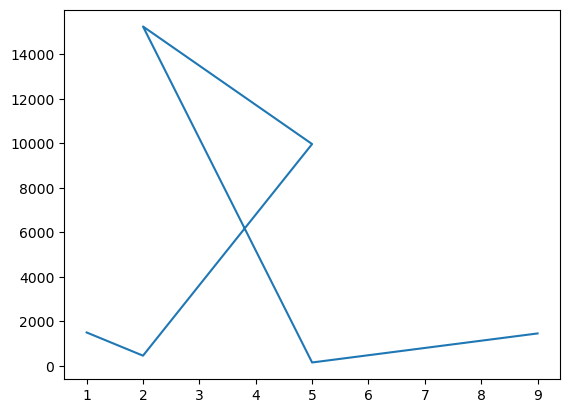

In [147]:
x = [1,2,5,2,5,9]
y = [1500,458,9964,15245,152,1456]

plt.plot(x,y)

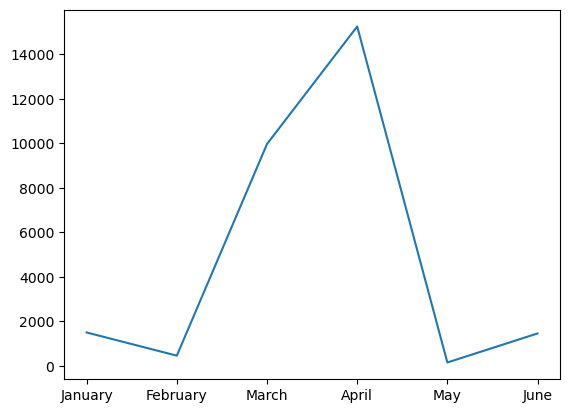

In [148]:
months = ("January", "February", "March", "April", "May", "June")
plt.plot(months,y)

Text(0.5, 1.0, 'Heading')

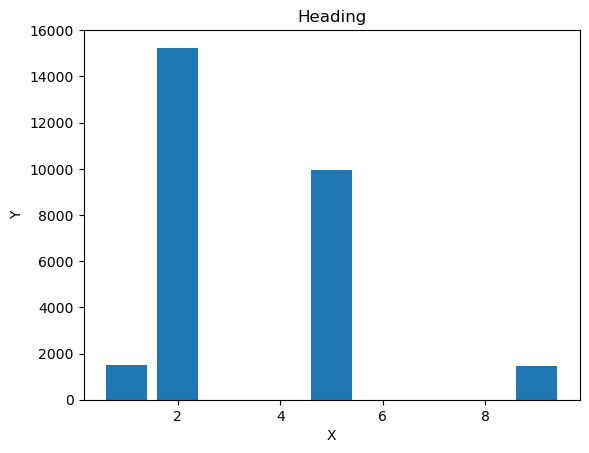

In [149]:
plt.bar(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Heading")

# Time & Pyplot

In [150]:
import matplotlib.pyplot as plt
import time as t

This program will help you to type faster
Please enter to continue: 
Type the word: shiva
Type the word: ramesh
Type the word: programming
Type the word: programming
Type the word: programming
You made 2mistake(s).
Now let's see your evalution


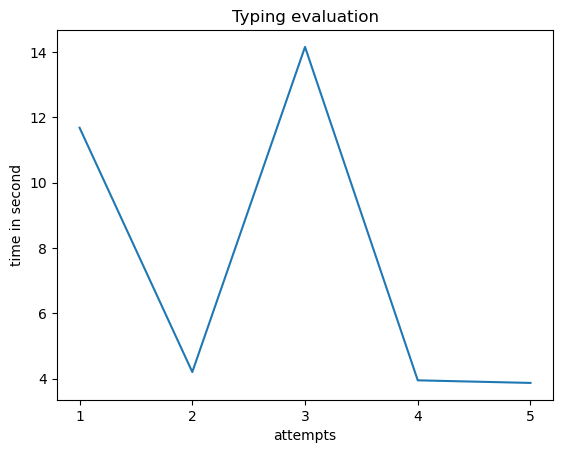

In [151]:
times = []
mistakes = 0 

print("This program will help you to type faster")
input("Please enter to continue: ")

while len(times) < 5:
    start = t.time()
    word = input("Type the word: ")
    end = t.time()
    time_elapsed = end - start
    
    times.append(time_elapsed)
    
    if (word.lower() != "programming"):
        mistakes += 1
        
print("You made " + str(mistakes) + "mistake(s).")
print("Now let's see your evalution")
t.sleep(3)


x = [1, 2, 3, 4, 5]
y = times

legend = ["1", "2", "3", "4", "5"]
plt.xticks(x,legend)

plt.ylabel("time in second")
plt.xlabel("attempts")
plt.title("Typing evaluation")

plt.plot(x,y)
plt.show()

# HTTP Request

In [152]:
import requests
r = requests.get("https://www.google.com")
r.status_code

200

In [153]:
r.headers

{'Date': 'Wed, 18 Oct 2023 03:49:09 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'Content-Security-Policy-Report-Only': "object-src 'none';base-uri 'self';script-src 'nonce-c1N1P0yTw-v-MRB5NOwPDg' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp", 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2023-10-18-03; expires=Fri, 17-Nov-2023 03:49:09 GMT; path=/; domain=.google.com; Secure, AEC=Ackid1QzJKzLXF_iEdaQLI2UChB3TJMNyGu5lEccZuTaq6J1WHe4Xvh5Ig; expires=Mon, 15-Apr-2024 03:49:09 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=Kesah8NRRw1IhGGa-yxwdkDrNdCTixJImPSSfWOzosLB0QirvuIqcKwoUfIy8_rsU45BSmNmFPydz-8-c0mJw7X3ya55B8I333DyzfcE6HOFEoLSjCRwlA9mpSkDI1mxvL-RAR3gsv3B2WhO5

In [154]:
r.headers["Date"]

'Wed, 18 Oct 2023 03:49:09 GMT'

In [155]:
r.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en-IN"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="c1N1P0yTw-v-MRB5NOwPDg">(function(){var _g={kEI:\'tVUvZdm_C9HT1sQP7qKw4AU\',kEXPI:\'0,793108,572359,207,4804,2316,383,246,5,1129120,1197757,134,503,380097,16114,28684,22430,1362,12320,17579,4998,17075,38444,2872,2891,11754,606,30668,30022,16105,230,1014,1,16916,2652,4,32894,26723,4437,22601,6636,7596,1,11942,30212,2,16737,23024,5679,1020,31123,4567,6259,23418,1252,33064,2,2,1,23827,799,10161,23351,872,6578,13056,6,1923,9779,42459,20198,928,19209,14,82,7651,5682,6873,4069,4308,18960,2306,3097,781,2249,15816,1804,7734,6072,2262,10339,6690,2171,13449,295,8545,17859,7768,146,5769,12385,3592,5210139,2,195,5994770,96,2803118,3311,141,795,29454,84,2,3,2,2,9,32,8,8,6,10,7,23940941,578,4043528,16673,37283,3621,1

# File Handling

In [156]:
f = open("untitled.txt")
print(f.read())

information alert
 Schedule learning time 
 Learning a little each day adds up. Research shows that students who make learning a habit are more likely to reach their goals. Set time aside to learn and get reminders using your learning scheduler.
Schedule learning time 
Learning a little each day adds up. Research shows that students who make learning a habit are more likely to reach their goals. Set time aside to learn and get reminders using your learning scheduler.


In [157]:
f = open("untitled.txt", "w")   #replace
f.write("information alert")

f = open("untitled.txt")
print(f.read())

information alert


In [158]:
f = open("untitled.txt", "a")   #append
f.write("\nSchedule learning time \nLearning a little each day adds up. Research shows that students who make learning a habit are more likely to reach their goals. Set time aside to learn and get reminders using your learning scheduler.")

f = open("untitled.txt")
print(f.read())

information alert
Schedule learning time 
Learning a little each day adds up. Research shows that students who make learning a habit are more likely to reach their goals. Set time aside to learn and get reminders using your learning scheduler.


In [159]:
f = open("untitled2.txt", "x") # create file

FileExistsError: [Errno 17] File exists: 'untitled2.txt'

In [ ]:
pip install xlrd

# Reading excel sheets

# Iris data

In [160]:
import pandas as pd
file = pd.ExcelFile("C://Users//91879//Downloads//sales.xlsx")
file

In [161]:
print(file.sheet_names)

['sales', 'customers']


In [162]:
sales = file.parse("sales")
sales

,Date,Customer,Invoice,Amount
0,2018-12-01,Steel Brothers Inc.,98,1340
1,2018-12-10,MMC Inc.,99,1900
2,2018-12-12,MMC Inc.,100,2900
3,2018-12-18,Steel Brothers Inc.,101,977
4,2018-12-21,Steel & Iron LLC,102,3400


In [163]:
type(sales)

pandas.core.frame.DataFrame

In [164]:
print(sales.Date)

0   2018-12-01
1   2018-12-10
2   2018-12-12
3   2018-12-18
4   2018-12-21
Name: Date, dtype: datetime64[ns]


In [165]:
sales.Amount.sum()

10517

In [166]:
sales.loc[0]

Date        2018-12-01 00:00:00
Customer    Steel Brothers Inc.
Invoice                      98
Amount                     1340
Name: 0, dtype: object

In [167]:
sales.loc[0 , "Amount"]

1340

In [168]:
sales.set_index("Amount", inplace=True)
sales.loc[1340]

Date        2018-12-01 00:00:00
Customer    Steel Brothers Inc.
Invoice                      98
Name: 1340, dtype: object

In [169]:
sales.set_index("Customer", inplace=True)
sales.loc["MMC Inc."]

,Date,Invoice
Customer,,
MMC Inc.,2018-12-10,99
MMC Inc.,2018-12-12,100


In [170]:
sales.reset_index()

,Customer,Date,Invoice
0,Steel Brothers Inc.,2018-12-01,98
1,MMC Inc.,2018-12-10,99
2,MMC Inc.,2018-12-12,100
3,Steel Brothers Inc.,2018-12-18,101
4,Steel & Iron LLC,2018-12-21,102


In [171]:
sales = file.parse("sales")
sales

,Date,Customer,Invoice,Amount
0,2018-12-01,Steel Brothers Inc.,98,1340
1,2018-12-10,MMC Inc.,99,1900
2,2018-12-12,MMC Inc.,100,2900
3,2018-12-18,Steel Brothers Inc.,101,977
4,2018-12-21,Steel & Iron LLC,102,3400


In [172]:
type(sales["Invoice"])

pandas.core.series.Series

In [173]:
sales.loc[sales["Invoice"] == 100]

,Date,Customer,Invoice,Amount
2,2018-12-12,MMC Inc.,100,2900


In [174]:
sales.loc[sales["Amount"] > 2000]

,Date,Customer,Invoice,Amount
2,2018-12-12,MMC Inc.,100,2900
4,2018-12-21,Steel & Iron LLC,102,3400


In [175]:
sales.loc[sales["Amount"].idxmax()]

Date        2018-12-21 00:00:00
Customer       Steel & Iron LLC
Invoice                     102
Amount                     3400
Name: 4, dtype: object

In [176]:
sales.loc[sales["Amount"].idxmax()]["Customer"]

'Steel & Iron LLC'

In [177]:
sales.loc[sales["Amount"] > 1800]

,Date,Customer,Invoice,Amount
1,2018-12-10,MMC Inc.,99,1900
2,2018-12-12,MMC Inc.,100,2900
4,2018-12-21,Steel & Iron LLC,102,3400


In [178]:
sales.loc[sales["Amount"] > 1800]["Customer"]

1            MMC Inc.
2            MMC Inc.
4    Steel & Iron LLC
Name: Customer, dtype: object

In [179]:
sales.loc[sales["Amount"] > 1800]["Customer"].unique()

array(['MMC Inc.', 'Steel & Iron LLC'], dtype=object)

In [180]:
sales.loc[sales["Amount"] > 1800]["Customer"].unique()[0]

'MMC Inc.'

In [181]:
sales.loc[sales["Amount"] > 1800]["Customer"].unique()[1]

'Steel & Iron LLC'

In [182]:
for customer in sales.loc[sales["Amount"] > 1800]["Customer"].unique():
    print(customer)

MMC Inc.
Steel & Iron LLC


# machine learning

In [183]:
from sklearn.datasets import load_iris

iris = load_iris()  # Note the parentheses
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [184]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [185]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [186]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [187]:
print(type(iris.target))

<class 'numpy.ndarray'>


In [188]:
print(iris.data.shape)

(150, 4)


In [189]:
print(iris.target.shape)

(150,)


# KNN

In [190]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)

In [191]:
x = iris.data
y = iris.target

In [192]:
KNN.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [193]:
KNN.predict([[4.7, 3.2, 1.3, 0.2]])

array([0])

In [194]:
KNN.predict([[5.9, 3.0,  5.1, 1.8]])

array([2])

In [195]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25 , random_state=40)

In [196]:
print(x_train.shape)

(112, 4)


In [197]:
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
print(y_pred)

[0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1 1 0 0 0 0 2 0
 0]


In [198]:
from sklearn import metrics
performance = metrics.accuracy_score(y_test, y_pred)
print(performance)

1.0


In [199]:
#Finding the best K value

In [200]:
k_values = {}
k = 1

while k <= 25:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    performance = metrics.accuracy_score(y_test, y_pred)
    k_values[k] = round(performance,4)
    k += 1
print(k_values)

{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 0.9737, 11: 0.9737, 12: 0.9737, 13: 0.9737, 14: 0.9737, 15: 0.9737, 16: 0.9737, 17: 1.0, 18: 0.9737, 19: 1.0, 20: 0.9737, 21: 0.9737, 22: 0.9737, 23: 1.0, 24: 0.9474, 25: 0.9474}


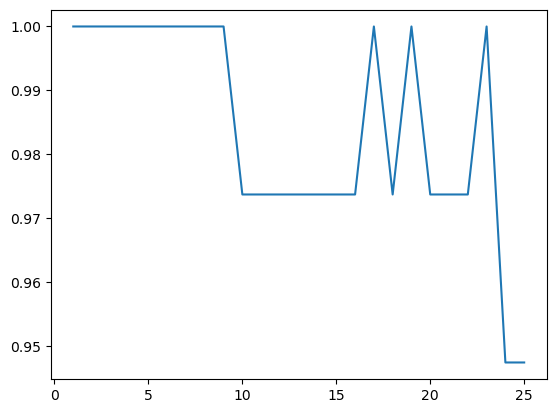

In [201]:
import matplotlib.pyplot as plt
plt.plot(list(k_values.keys()), list(k_values.values()))
plt.xlabel = ("Value of K")
plt.ylabel = ("performance")
plt.title = ("best K")
plt.show()

# Logistic Regression

In [202]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(y_pred)

[0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1 1 0 0 0 0 2 0
 0]


C:\Users\91879\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [203]:
y_pred_proba = logreg.predict_proba(x_test)
print(y_pred_proba)

[[9.81553733e-01 1.84461944e-02 7.30975236e-08]
 [1.21954715e-02 7.35122358e-01 2.52682171e-01]
 [1.15838529e-04 7.24090229e-02 9.27475139e-01]
 [3.74225207e-07 7.18651282e-03 9.92813113e-01]
 [2.71611368e-02 9.12440952e-01 6.03979110e-02]
 [2.95491418e-05 2.53181773e-02 9.74652274e-01]
 [2.81934624e-03 7.72966265e-01 2.24214388e-01]
 [2.01505152e-02 8.91666763e-01 8.81827213e-02]
 [1.40756096e-02 7.02923181e-01 2.83001210e-01]
 [9.70322167e-01 2.96777623e-02 7.08772433e-08]
 [1.26899353e-02 8.59114454e-01 1.28195610e-01]
 [9.69068341e-01 3.09314824e-02 1.76837720e-07]
 [9.81750636e-01 1.82493152e-02 4.83685434e-08]
 [1.72746500e-03 4.60182410e-01 5.38090125e-01]
 [7.67798885e-02 9.17572645e-01 5.64746679e-03]
 [1.10912834e-05 1.95841656e-02 9.80404743e-01]
 [9.90187089e-04 4.02411513e-01 5.96598300e-01]
 [3.29248767e-05 5.39953575e-02 9.45971718e-01]
 [1.82848077e-03 7.95575306e-01 2.02596213e-01]
 [5.32903335e-02 8.79405164e-01 6.73045025e-02]
 [1.96943792e-05 3.64386274e-02 9.635416

In [204]:
performance = metrics.accuracy_score(y_test, y_pred)
print(performance)

1.0


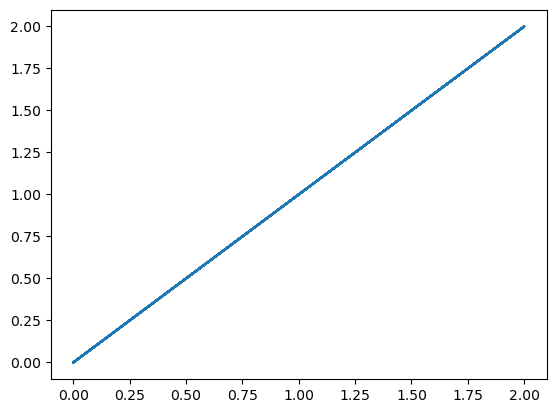

In [205]:
import matplotlib.pyplot as plt
plt.plot(y_test, y_pred)
plt.show()

In [7]:
numbers = range(2, 100)

prime_numbers = [num for num in numbers if all(num % i != 0 for i in range(2 , num-1))]
print(prime_numbers)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [1]:
numbers = range(2, 100)  # Start from 2 since 0 and 1 are not prime numbers
prime_numbers = [num for num in numbers if all(num % i != 0 for i in range(2, int(num**0.5) + 1))]
print(prime_numbers)


[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


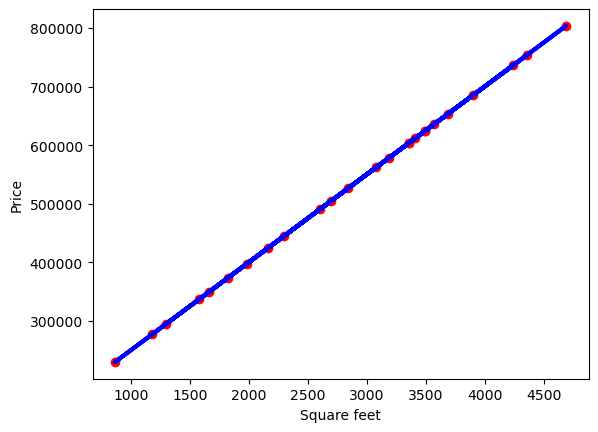

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


np.random.seed(42)
square_feet = np.random.randint(800, 5000, 100)
price = 150 * square_feet + np.random.normal(100000, 100)
square_feet = square_feet.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(square_feet, price, test_size = 0.25, random_state = 42)

model = LinearRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)

plt.scatter(X_test, Y_test, color= "red", label="Actual_price")
plt.plot(X_test, Y_pred, color="blue", linewidth=3, label="Regession_line")
plt.xlabel("Square feet")
plt.ylabel("Price")
plt.show()

Cross_val_result 1.0


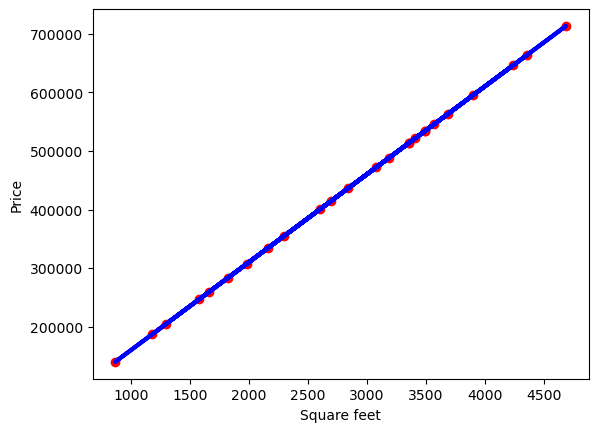

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


np.random.seed(42)
square_feet = np.random.randint(800, 5000, 100)
price = 150 * square_feet + np.random.normal(10000, 100)
square_feet = square_feet.reshape(-1,1)

model = LinearRegression()

X_train, X_test, Y_train, Y_test = train_test_split(square_feet, price, test_size = 0.25, random_state = 42)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
Cross_val_result = cross_val_score(model, square_feet, price, cv=kf)
print("Cross_val_result",Cross_val_result.mean())

plt.scatter(X_test, Y_test, color= "red", label="Actual_price")
plt.plot(X_test, Y_pred, color="blue", linewidth=3, label="Regession_line")
plt.xlabel("Square feet")
plt.ylabel("Price")
plt.show()

In [4]:
# Sentiment analysis 

from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("emails.csv")

data["Sentiment_score"] = data["content"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


data["Sentiment_class"] = data["Sentiment_score"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral")

data.head()

,Unnamed: 0,filename,Message-ID,content,Class,Sentiment_score,Sentiment_class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,-0.183333,Negative
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive,-0.400000,Negative
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive,0.000000,Neutral
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive,-0.471759,Negative
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,-0.166667,Negative


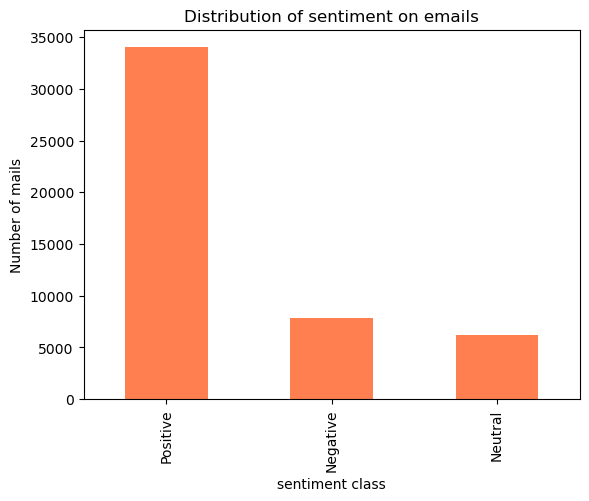

In [6]:
Sentiment_distribution = data["Sentiment_class"].value_counts()
Sentiment_distribution.plot(kind="bar", color="coral")
plt.title("Distribution of sentiment on emails" )
plt.xlabel("sentiment class")
plt.ylabel("Number of mails")
plt.show()

In [6]:
numbers = range(2,55,3)

def average(numbers):
    Total = sum(numbers)
    Length = len(numbers)
    return Total/Length

average = average(numbers)
print(average)

27.5


In [13]:
scores = range(4, 1250, 88)
def analyze_scores(scores):
    average_score = sum(scores) / len(scores)
    highest_score = max(scores)
    lowest_score = min(scores)
    return average_score, highest_score, lowest_score
average_score, highest_score, lowest_score = analyze_scores(scores)

highest_score
average_score
lowest_score

4

In [4]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'c'], 'C': [4, 5, 6]})

# Find the numeric and categorical columns
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns

# Add the mean of each numeric column to each row of the DataFrame
for column in numeric_columns:
    df[column] += df[column].mean()

# Print the DataFrame
print(df)

     A  B     C
0  3.0  a   9.0
1  4.0  b  10.0
2  5.0  c  11.0


In [5]:
numeric_columns

Index(['A', 'C'], dtype='object')

In [6]:
categorical_columns

Index(['B'], dtype='object')

In [5]:
n = int(input("Enter the number of rows: "))
for i in range(n, 0, -1):
    for j in range(0, i):
        print("*", end='')
    print()


Enter the number of rows: 5
*****
****
***
**
*


In [1]:

import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'country': ['USA', 'USA', 'Canada', 'Canada', 'Mexico', 'Mexico'],
    'city': ['New York', 'Los Angeles', 'Toronto', 'Montreal', 'Mexico City', 'Guadalajara'],
    'sales': [10000, 8000, 7000, 6000, 5000, 4000]})

# Group the DataFrame by country and calculate the total sales for each country

grouped_df = df.groupby("country")["sales"].sum()
print(grouped_df)


country
Canada    13000
Mexico     9000
USA       18000
Name: sales, dtype: int64


In [3]:
import statistics

numbers = [1, 2, 3, 4, 5, 9, 15]

Std_dev = statistics.stdev(numbers)
print(Std_dev)

4.894116973712515


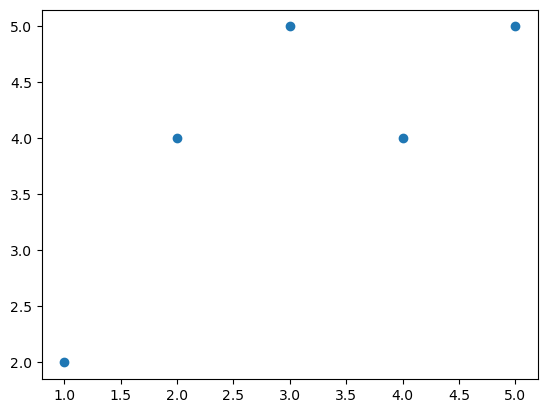

In [5]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]

plt.scatter(x,y)
plt.show()

In [9]:
def avg_word_length(text):
    words = text.split()
    Word_lengths = [len(word) for word in words]
    average_length = sum(Word_lengths)/len(words)
    return average_length

avg_word_length = avg_word_length("Write a Python function to calculate the average length of words in a given string.")
avg_word_length

4.6

In [21]:
import collections

def frequent_word(text):
    words = text.split()
    Word_count = collections.Counter(words)
    Most_frequent_words = Word_count.most_common(1)[0][0]
    return Most_frequent_words

Most_frequent_words = frequent_word("Write a Python function to calculate the average length of words in a given string.")
Most_frequent_words

'a'

In [22]:
import collections

def frequent_word(text):
    words = text.split()
    Word_count = collections.Counter(words)
    Most_frequent_words = Word_count.most_common(1)[0][0]
    return Most_frequent_words

Most_frequent_words = frequent_word("Write a Python function to calculate the average length of words in a given string.")
print(Most_frequent_words)

a


In [28]:
import collections

def frequent_word(text):
    words = text.split()
    Word_count = collections.Counter(words)
    Most_frequent_word = Word_count.most_common(5)[0][0]
    return Most_frequent_word

Most_frequent_word = frequent_word("Write Python function to calculate the average length of words in a given string.")
print(Most_frequent_word)

Write


In [11]:
prime_numbers = []
def Primes(numbers):
    for i in numbers:
        is_prime = True
        for j in range (2, int(i**0.5)+1):
            if i % j == 0:
                is_prime = False
                break
        if is_prime and i > 1:
            prime_numbers.append(i)
    return prime_numbers
        
    
primenumbers = Primes(range(1,150))
print(primenumbers)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149]


In [6]:
def Primes(numbers):
    prime_numbers = []  # Initialize an empty list to store prime numbers
    
    for i in numbers:
        is_prime = True  # Assume that i is prime until proven otherwise
        for j in range(2, int(i**0.5) + 1):  # Iterate from 2 to the square root of i
            if i % j == 0:
                is_prime = False  # i is divisible by j, so it is not prime
                break
        
        if is_prime and i > 1:  # Check if i is prime and greater than 1
            prime_numbers.append(i)  # Add i to the list of prime numbers
    
    return prime_numbers

primenumbers = Primes(range(1, 150))
print(primenumbers)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149]


In [3]:
def remove_duplicates(list_data):
    unique_data = set(list_data)
    return list(unique_data)

unique_data = remove_duplicates("Write a Python function to calculate the average length of words in a given string.")
print(unique_data)

['g', 'W', 'y', 'e', 'a', 'o', '.', 'h', 'r', 'v', 'P', 'c', 's', 'd', 'w', 'i', 'n', 'f', 't', ' ', 'u', 'l']


In [6]:
import math

def std_deviation(Numbers):
    Average = sum(Numbers)/len(Numbers)
    Variance_sum = [(Average - number)**2 for number in Numbers]
    variance = sum(Variance_sum)/len(Numbers)
    std_dev = math.sqrt(variance)
    
    return std_dev

std_deviation = std_deviation([1,5,15,46,15,5,5,5,5,5,2])
print(std_deviation)

12.213662584131276


In [10]:
def is_palindrome(string):
    string = string.lower().strip()
    reversed_string = string[::-1]
    return string == reversed_string
palindrome = is_palindrome("wiw")
print(palindrome)

True


In [24]:
wiv = "wiw"
wiw = "your_value_here"
shish = "shish"

def largest_palindrome(strings):
    palindromes = [string for string in strings if is_palindrome(string)]
    if palindromes:
        longest_palindrome = max(palindromes, key=len)
        return longest_palindrome 
    else: 
        return None

Lar_Palindrome = largest_palindrome([wiv, wiw, shish])
print(Lar_Palindrome)

wiw


In [5]:
## Sql
import mysql.connector
from mysql.connector import Error
import pandas as pd

In [16]:
def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host = host_name,
            user = user_name,
            passwd = user_password
        )
        print ("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")
    return connection

#password

PW = "root"

#Database Name

db = "mysql_python"
connection = create_server_connection("localhost", "root", PW)



MySQL Database connection successful


In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
#
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2, 4, 5, 4, 5])

model = LinearRegression()
model.fit(X,Y)

X_new = np.array([6,9,12]).reshape(-1, 1)
Y_pred = model.predict(X_new)
Y_pred

array([5.8, 7.6, 9.4])

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#load iris dataset

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size= 0.25, random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy_score = accuracy_score(y_test, y_pred)

print(accuracy_score)

1.0


In [40]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'A': [1, 2, 3, 4, 6], 'B': ['a', 'b', 'c', 'd', 'e'], 'c': [4, 5, 6, 15, 55]})
df.head()

,A,B,c
0,1,a,4
1,2,b,5
2,3,c,6
3,4,d,15
4,6,e,55


In [37]:
Q1 = df["c"].quantile(0.25)
Q3 = df["c"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["c"] < Q1-IQR*1.5) | (df["c"] > Q3+1.5*IQR)]
outliers

,A,B,c
4,6,e,55


In [31]:
def calculate_stats(numbers):
    mean = sum(numbers)/len(numbers)
    variance = sum((x - mean)**2 for x in numbers) / len(numbers)
    std_dev = variance**0.5
    return mean, std_dev

calculate_stats(range(1,45,3))


(22.0, 12.96148139681572)

In [32]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'df' is your DataFrame with features
df = df.drop(columns=['B'])

vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]


print(vif_data)

  Feature       VIF
0       A  5.291388
1       c  5.291388


In [41]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = df.drop(columns=["B"])

vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["vif"] = [variance_inflation_factor(df.values, i) for i in range (df.shape[1])]

vif_data["Feature"]
print(vif_data["vif"])

0    5.291388
1    5.291388
Name: vif, dtype: float64


In [1]:
def reverse_string(input_str):
    return input_str[::-1]

result = reverse_string("hello")
print(result)


olleh


In [2]:
def is_palindrome(input_str):
    cleaned_str = ''.join(char.lower() for char in input_str if char.isalnum())
    return cleaned_str == cleaned_str[::-1]

result = is_palindrome("A man, a plan, a canal, Panama!")
print(result)


True


In [1]:
count=0
while count<5:
    print(f"Count:{count}")
    count+=1

Count:0
Count:1
Count:2
Count:3
Count:4


In [3]:
fruits=["apple","banana","cherry"]
for fruit in fruits:
    print(f"Currentfruit:{fruit}")

Currentfruit:apple
Currentfruit:banana
Currentfruit:cherry


In [4]:
for i in range(3):
    for j in range(2):
        print(f"({i},{j})")

(0,0)
(0,1)
(1,0)
(1,1)
(2,0)
(2,1)


In [6]:
a  = abs(-6)
print(a)

6


In [7]:
a  = pow(-6, 3)
print(a)

-216


In [9]:
a  = round(2.868)
print(a)

3


In [10]:
import random
random_number = random.random()
print(random_number)

0.9106657407127711


In [11]:
numbers=[1,2,3,4,5]
del numbers[2]

print(numbers)

[1, 2, 4, 5]


In [12]:
numbers_range = random.randint(1, 42)
print(numbers_range)

15


In [13]:
import math
angle = math.pi
print(angle)

3.141592653589793


In [14]:
text = "python"

centered_text = text.center(8, "-")
print(centered_text)

-python-


In [15]:
squares = [x**2 for x in range(15)]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196]

In [17]:
even_number = [i for i in range(15) if i%2 == 0]
print(even_number)

[0, 2, 4, 6, 8, 10, 12, 14]


In [18]:
pairs_comprehension = [(x,y) for x in range (8) for y in range (8)]
print(pairs_comprehension)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]


In [21]:
import time

current_time = time.localtime()
current_time

time.struct_time(tm_year=2024, tm_mon=1, tm_mday=29, tm_hour=21, tm_min=59, tm_sec=18, tm_wday=0, tm_yday=29, tm_isdst=0)

In [22]:
year = current_time.tm_year
year

2024

In [23]:
month = current_time.tm_mon
month

1

In [25]:
import calendar

cal_month = calendar.month(2023, 11)
print(cal_month)

   November 2023
Mo Tu We Th Fr Sa Su
       1  2  3  4  5
 6  7  8  9 10 11 12
13 14 15 16 17 18 19
20 21 22 23 24 25 26
27 28 29 30



In [28]:
sleep_time = time.sleep(2)
sleep_time

In [29]:
def modify_list(list):
    print("Inside function (Before modification): ", list )
    list.append(4)
    print("Inside function (After modification): ", list )

main_list = [1,2,5,6,5]
list1 = modify_list(main_list)
list1

Inside function (Before modification):  [1, 2, 5, 6, 5]
Inside function (After modification):  [1, 2, 5, 6, 5, 4]


In [32]:
multiply = lambda x, y: (x*y)
result = multiply(3,4)
result

12

In [2]:
i = 3
while i < 10:
    print(i)
    i += 1


3
4
5
6
7
8
9


In [16]:
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5)+1):
        if n == 0:
            return False
    return True

prime_numbers = []

for num in range(2, 100, 1):
    if is_prime(num):
        prime_numbers.append(num)
        
print(prime_numbers)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [5]:
# Example of using AI for image recognition using a pre-trained deep learning model
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

# Load pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Load and preprocess input image
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 2s 2s/step
Predicted: [('n02504458', 'African_elephant', 0.3249494), ('n02504013', 'Indian_elephant', 0.289825), ('n01871265', 'tusker', 0.2759833)]


In [1]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

# Example usage
numbers = [64, 34, 25, 12, 22, 11, 90]
bubble_sort(numbers)
print("Sorted array:", numbers)

Sorted array: [11, 12, 22, 25, 34, 64, 90]


In [2]:
colors = ['red', 'green', 'blue']
for index, color in enumerate(colors):
    print(f"Index {index}: {color}")

Index 0: red
Index 1: green
Index 2: blue


In [1]:
names = ['Alice', 'Bob', 'Charlie']
scores = [85, 90, 75]
for name, score in zip(names, scores):
    print(f"{name}: {score}")

Alice: 85
Bob: 90
Charlie: 75


In [2]:
def median(num):
    num.sort()
    n = len(num)
    if n % 2 == 0:
        return (num[n//2 - 1]+num[n//2])/2
    else:
        return (num[n//2])
    
print(median([5, 2, 7, 1, 9])) 

5


In [3]:
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

# Example usage
print(is_prime(11))

True


In [14]:
def is_prime(num):
    num.sort()
    prime = []
    for n in num:
        if n <= 1:
            continue
        for i in range(2, int(n**0.5) + 1):
            if n % i == 0:
                break
        else:
            prime.append(n)
    return prime

num = [5, 2, 7, 1, 9, 11]
print(is_prime(n))

[2, 5, 7]


In [15]:
from collections import Counter

# Count the frequency of elements in a list
numbers = [1, 2, 3, 1, 2, 3, 4, 5]
count = Counter(numbers)
print(count)

Counter({1: 2, 2: 2, 3: 2, 4: 1, 5: 1})


In [1]:
def reverse_str(s):
    return s[::-1]

print(reverse_str("hellow"))

wolleh


In [4]:
import os
if os.path.exists("elephant.jpg"):
    print("File exits")
else:
    print("File does no exits")

File exits


In [8]:
import numpy as np
Z = np.zeros(10)
print(Z)
Z[4] = 1
print(Z)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
Z = np.arange(10,50)
print(Z)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


In [10]:
Z = Z[::-1]
print(Z)

[49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26
 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10]


In [11]:
x = [80, 75, 90, 85, 65]
y = [5, 4, 6, 7, 3]

r = np.corrcoef(x, y)[0,1]
print("Correlation Cooeficient-",r.round(3)*100,"%")

Correlation Cooeficient- 90.4 %


In [12]:
from gensim.models import Word2Vec
sentences = [['machine', 'learning', 'is', 'awesome'], ['natural', 'language', 'processing']]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
print(model.wv['machine'])

[ 8.13227147e-03 -4.45733406e-03 -1.06835726e-03  1.00636482e-03
 -1.91113955e-04  1.14817743e-03  6.11386076e-03 -2.02715401e-05
 -3.24596534e-03 -1.51072862e-03  5.89729892e-03  1.51410222e-03
 -7.24261976e-04  9.33324732e-03 -4.92128357e-03 -8.38409644e-04
  9.17541143e-03  6.74942741e-03  1.50285603e-03 -8.88256077e-03
  1.14874600e-03 -2.28825561e-03  9.36823711e-03  1.20992784e-03
  1.49006362e-03  2.40640994e-03 -1.83600665e-03 -4.99963388e-03
  2.32429506e-04 -2.01418041e-03  6.60093315e-03  8.94012302e-03
 -6.74754381e-04  2.97701475e-03 -6.10765442e-03  1.69932481e-03
 -6.92623248e-03 -8.69402662e-03 -5.90020278e-03 -8.95647518e-03
  7.27759488e-03 -5.77203138e-03  8.27635173e-03 -7.24354526e-03
  3.42167495e-03  9.67499893e-03 -7.78544787e-03 -9.94505733e-03
 -4.32914635e-03 -2.68313056e-03 -2.71289347e-04 -8.83155130e-03
 -8.61755759e-03  2.80021061e-03 -8.20640661e-03 -9.06933658e-03
 -2.34046578e-03 -8.63180775e-03 -7.05664977e-03 -8.40115082e-03
 -3.01328895e-04 -4.56429

In [13]:
identity_matrix = np.eye(3,2,1)
print(identity_matrix)

[[0. 1.]
 [0. 0.]
 [0. 0.]]


In [14]:
import numpy as np

Z = np.zeros(10)
print(Z)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
Z = np.arange(10,50)
print(Z)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


In [16]:
Z = np.arange(10,50,5)
print(Z)

[10 15 20 25 30 35 40 45]


In [17]:
Z = np.arange(9).reshape(3,3)
print(Z)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [18]:
Z = np.nonzero([1,2,0,0,4,0])
print(Z)

(array([0, 1, 4], dtype=int64),)


In [19]:
Z = np.eye(4,4)
print(Z)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [20]:
Z = np.random.random((3,3,3))
print(Z)

[[[0.31527199 0.44102197 0.75299471]
  [0.88594757 0.55549107 0.32046718]
  [0.26867613 0.96854782 0.19028309]]

 [[0.85010354 0.02161451 0.89330604]
  [0.52906481 0.22568327 0.59844297]
  [0.33502921 0.9508562  0.64211901]]

 [[0.62233531 0.02040546 0.0892201 ]
  [0.24454975 0.26949299 0.50772022]
  [0.81279446 0.5154368  0.71537322]]]


In [21]:
Z = np.random.random((100,1))

Zmax, Zmin = Z.min(), Z.min()
print(Zmax, Zmin)

0.0066530044980605 0.0066530044980605


In [22]:
Z = np.arange(10,50)
print(Z)
Z_mean = Z.mean()
print(Z_mean)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
29.5


In [23]:
Z = np.ones((10,10))
print(Z)
Z[1:-1,1:-1] = 0
print(Z)


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [24]:
Z = np.zeros((8,8),dtype=int)
Z[1::2,::2] = 1
Z[::2,1::2] = 1
print(Z)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [25]:
import pandas as pd 

D = pd.Series([1,2,3,7,5,6,"vsdhb", np.nan, 5, "hfhhf"])
print(D)

0        1
1        2
2        3
3        7
4        5
5        6
6    vsdhb
7      NaN
8        5
9    hfhhf
dtype: object


In [26]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index = dates,  columns =list( "abcd"))
print(df)

                   a         b         c         d
2013-01-01  0.591631 -1.027433 -0.310287  0.133221
2013-01-02 -0.625201  0.863766 -1.450113 -0.529140
2013-01-03  0.315672 -0.483400  0.619788  0.348624
2013-01-04  0.306563 -0.612871 -0.752369  0.338808
2013-01-05  0.611446  0.424278 -0.137149 -0.492177
2013-01-06 -1.380450  0.089370 -0.511539  1.344397


In [27]:
df2 = pd.DataFrame({
    'A': 1.1,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([-3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})

In [28]:
df2.head()

,A,B,C,D,E,F
0,1.1,2013-01-02,1.0,-3,test,foo
1,1.1,2013-01-02,1.0,-3,train,foo
2,1.1,2013-01-02,1.0,-3,test,foo
3,1.1,2013-01-02,1.0,-3,train,foo


In [29]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [30]:
df2.A

0    1.1
1    1.1
2    1.1
3    1.1
Name: A, dtype: float64

In [31]:
df2.boxplot

<bound method boxplot_frame of      A          B    C  D      E    F
0  1.1 2013-01-02  1.0 -3   test  foo
1  1.1 2013-01-02  1.0 -3  train  foo
2  1.1 2013-01-02  1.0 -3   test  foo
3  1.1 2013-01-02  1.0 -3  train  foo>

In [32]:
df2.abs

<bound method NDFrame.abs of      A          B    C  D      E    F
0  1.1 2013-01-02  1.0 -3   test  foo
1  1.1 2013-01-02  1.0 -3  train  foo
2  1.1 2013-01-02  1.0 -3   test  foo
3  1.1 2013-01-02  1.0 -3  train  foo>

In [33]:
df2.add

<bound method DataFrame.add of      A          B    C  D      E    F
0  1.1 2013-01-02  1.0 -3   test  foo
1  1.1 2013-01-02  1.0 -3  train  foo
2  1.1 2013-01-02  1.0 -3   test  foo
3  1.1 2013-01-02  1.0 -3  train  foo>

In [34]:
df2.clip

<bound method NDFrame.clip of      A          B    C  D      E    F
0  1.1 2013-01-02  1.0 -3   test  foo
1  1.1 2013-01-02  1.0 -3  train  foo
2  1.1 2013-01-02  1.0 -3   test  foo
3  1.1 2013-01-02  1.0 -3  train  foo>

In [35]:
df2.add_prefix

<bound method NDFrame.add_prefix of      A          B    C  D      E    F
0  1.1 2013-01-02  1.0 -3   test  foo
1  1.1 2013-01-02  1.0 -3  train  foo
2  1.1 2013-01-02  1.0 -3   test  foo
3  1.1 2013-01-02  1.0 -3  train  foo>

In [36]:
df2[["A","C"]].corr()

,A,C
A,NaN,NaN
C,NaN,NaN


In [37]:
df2.index

Index([0, 1, 2, 3], dtype='int64')

In [38]:
df2 = pd.DataFrame({
    'A': 1.1,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([-3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})

In [39]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [40]:
df2.values

array([[1.1, Timestamp('2013-01-02 00:00:00'), 1.0, -3, 'test', 'foo'],
       [1.1, Timestamp('2013-01-02 00:00:00'), 1.0, -3, 'train', 'foo'],
       [1.1, Timestamp('2013-01-02 00:00:00'), 1.0, -3, 'test', 'foo'],
       [1.1, Timestamp('2013-01-02 00:00:00'), 1.0, -3, 'train', 'foo']],
      dtype=object)

In [41]:
df2.describe()

,A,B,C,D
count,4.0,4,4.0,4.0
mean,1.1,2013-01-02 00:00:00,1.0,-3.0
min,1.1,2013-01-02 00:00:00,1.0,-3.0
25%,1.1,2013-01-02 00:00:00,1.0,-3.0
50%,1.1,2013-01-02 00:00:00,1.0,-3.0
75%,1.1,2013-01-02 00:00:00,1.0,-3.0
max,1.1,2013-01-02 00:00:00,1.0,-3.0
std,0.0,NaN,0.0,0.0


In [42]:
df2.T

,0,1,2,3
A,1.1,1.1,1.1,1.1
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1.0,1.0,1.0,1.0
D,-3,-3,-3,-3
E,test,train,test,train
F,foo,foo,foo,foo


In [43]:
df2.sort_index(axis = 1, ascending = False)

,F,E,D,C,B,A
0,foo,test,-3,1.0,2013-01-02,1.1
1,foo,train,-3,1.0,2013-01-02,1.1
2,foo,test,-3,1.0,2013-01-02,1.1
3,foo,train,-3,1.0,2013-01-02,1.1


In [44]:
df2.sort_values(by = "E")

,A,B,C,D,E,F
0,1.1,2013-01-02,1.0,-3,test,foo
2,1.1,2013-01-02,1.0,-3,test,foo
1,1.1,2013-01-02,1.0,-3,train,foo
3,1.1,2013-01-02,1.0,-3,train,foo


In [45]:
df2["D"]

0   -3
1   -3
2   -3
3   -3
Name: D, dtype: int32

In [46]:
df2[0:3]

,A,B,C,D,E,F
0,1.1,2013-01-02,1.0,-3,test,foo
1,1.1,2013-01-02,1.0,-3,train,foo
2,1.1,2013-01-02,1.0,-3,test,foo


In [47]:
df2["E"[0]]

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): ['test', 'train']

In [48]:
df2.loc[:,["A","D"]]

,A,D
0,1.1,-3
1,1.1,-3
2,1.1,-3
3,1.1,-3


In [113]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': ['a', 'b', 'c', 'd', 'e']
}, index=['row1', 'row2', 'row3', 'row4', 'row5'])
df.head()

,A,B
row1,1,a
row2,2,b
row3,3,c
row4,4,d
row5,5,e


In [114]:
df.loc["row2"]

A    2
B    b
Name: row2, dtype: object

In [115]:
df.loc["row2", "B"]

'b'

In [116]:
df.iloc[1]

A    2
B    b
Name: row2, dtype: object

In [117]:
df.iloc[1,1]

'b'

In [118]:
df.loc[df["A"]>3]

,A,B
row4,4,d
row5,5,e


In [119]:
df.iloc[(df["A"]>3).values]

,A,B
row4,4,d
row5,5,e


In [120]:
df[df.A>2]

,A,B
row3,3,c
row4,4,d
row5,5,e


In [121]:
df["C"] = [6,7,np.nan,9,10]

In [122]:
df

,A,B,C
row1,1,a,6.0
row2,2,b,7.0
row3,3,c,NaN
row4,4,d,9.0
row5,5,e,10.0


In [123]:
df[df["C"].isin([6,7,8])]


,A,B,C
row1,1,a,6.0
row2,2,b,7.0


In [124]:
df.iat[0,2]=25
df.head()

,A,B,C
row1,1,a,25.0
row2,2,b,7.0
row3,3,c,NaN
row4,4,d,9.0
row5,5,e,10.0


In [125]:
df.dropna(how = "any")

,A,B,C
row1,1,a,25.0
row2,2,b,7.0
row4,4,d,9.0
row5,5,e,10.0


In [126]:
df1 = df.fillna(value = 34)
df1.head()

,A,B,C
row1,1,a,25.0
row2,2,b,7.0
row3,3,c,34.0
row4,4,d,9.0
row5,5,e,10.0


In [127]:
pd.isnull(df)

,A,B,C
row1,False,False,False
row2,False,False,False
row3,False,False,True
row4,False,False,False
row5,False,False,False


In [128]:
df.head()

,A,B,C
row1,1,a,25.0
row2,2,b,7.0
row3,3,c,NaN
row4,4,d,9.0
row5,5,e,10.0


In [129]:
df1 = df.fillna(value = df["C"].mean())
df1.head()

,A,B,C
row1,1,a,25.00
row2,2,b,7.00
row3,3,c,12.75
row4,4,d,9.00
row5,5,e,10.00


In [130]:
df["A"].mean()

3.0

In [133]:
df = df.drop(labels=['B'], axis=1)
df.head()

,A,C
row1,1,25.0
row2,2,7.0
row3,3,NaN
row4,4,9.0
row5,5,10.0


In [134]:
df.corr()

,A,C
A,1.000000,-0.618794
C,-0.618794,1.000000


In [136]:
df1.value_counts()

A  B  C    
1  a  25.00    1
2  b  7.00     1
3  c  12.75    1
4  d  9.00     1
5  e  10.00    1
Name: count, dtype: int64

In [138]:
df1["B"].str.upper()

row1    A
row2    B
row3    C
row4    D
row5    E
Name: B, dtype: object

In [139]:
df1["B"].str.upper()

row1    A
row2    B
row3    C
row4    D
row5    E
Name: B, dtype: object

In [141]:
df

,A,C
row1,1,25.0
row2,2,7.0
row3,3,NaN
row4,4,9.0
row5,5,10.0


In [153]:
df2.groupby(["B","E", "F"], observed=False).sum()

A    C  D
B          E     F               
2013-01-02 test  foo  2.2  2.0 -6
           train foo  2.2  2.0 -6

In [150]:
df2

,A,B,C,D,E,F
0,1.1,2013-01-02,1.0,-3,test,foo
1,1.1,2013-01-02,1.0,-3,train,foo
2,1.1,2013-01-02,1.0,-3,test,foo
3,1.1,2013-01-02,1.0,-3,train,foo


In [164]:
# Define tuples
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz'],
                    ['foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two'],
                    ['one', 'two', 'one', 'two']]))

# Create MultiIndex from tuples
index = pd.MultiIndex.from_tuples(tuples)

# Generate random data with the correct shape
random_data_shape = (len(index), 2)  # Shape is (10, 2)
random_data = np.random.rand(*random_data_shape)

# Create DataFrame with random data and MultiIndex
data = pd.DataFrame(random_data, index=index, columns=["A", "B"])

data.head()

A         B
bar foo one one  0.447451  0.583762
        two two  0.185021  0.016397
baz qux one one  0.117465  0.117131
        two two  0.356922  0.724193

In [167]:
stack = data.stack()

In [169]:
unstack = stack.unstack()
unstack

A         B
bar foo one one  0.447451  0.583762
        two two  0.185021  0.016397
baz qux one one  0.117465  0.117131
        two two  0.356922  0.724193

In [170]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': ['a', 'b', 'c', 'd', 'e']
}, index=['row1', 'row2', 'row3', 'row4', 'row5'])
df.head()

,A,B
row1,1,a
row2,2,b
row3,3,c
row4,4,d
row5,5,e


In [172]:
pd.pivot_table(df, values= "A", index = df.index, columns = "B") 

B,a,b,c,d,e
row1,1.0,NaN,NaN,NaN,NaN
row2,NaN,2.0,NaN,NaN,NaN
row3,NaN,NaN,3.0,NaN,NaN
row4,NaN,NaN,NaN,4.0,NaN
row5,NaN,NaN,NaN,NaN,5.0


<Axes: >

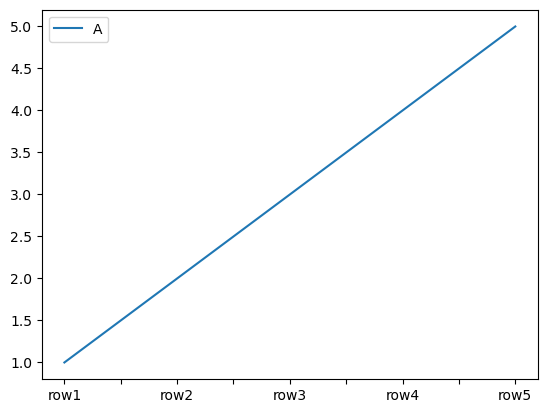

In [173]:
df.plot()

<Figure size 640x480 with 0 Axes>

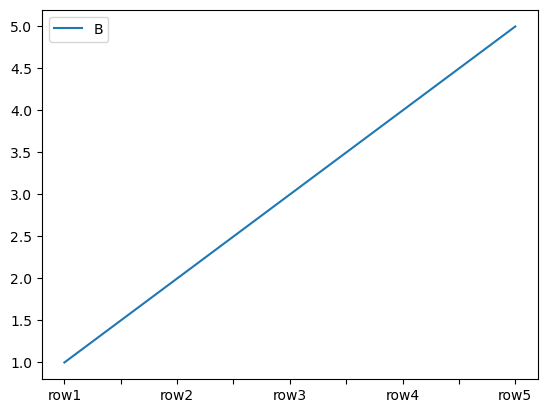

In [177]:
import matplotlib.pyplot as plt
plt.figure()
df.plot()
plt.legend("Best")

In [181]:
df.to_csv("csvfile.csv")
pd.read_csv("csvfile.csv")

,Unnamed: 0,A,B
0,row1,1,a
1,row2,2,b
2,row3,3,c
3,row4,4,d
4,row5,5,e


In [182]:
df.to_excel("excelfile.xlsx")
pd.read_excel("excelfile.xlsx")

,Unnamed: 0,A,B
0,row1,1,a
1,row2,2,b
2,row3,3,c
3,row4,4,d
4,row5,5,e


In [3]:
df = pd.read_csv("C:\\Users\\91879\\Downloads\\Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [9]:
df.describe().round(2)

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.00,177866.00,177866.00,177866.00,177477.00,1.778660e+05,1.778610e+05
mean,98172.45,2020.52,58.84,1073.11,29.13,2.202313e+08,5.297672e+10
std,2442.45,2.99,91.98,8358.62,14.89,7.584987e+07,1.578047e+09
min,1545.00,1997.00,0.00,0.00,1.00,4.385000e+03,1.001020e+09
25%,98052.00,2019.00,0.00,0.00,18.00,1.814743e+08,5.303301e+10
50%,98122.00,2022.00,0.00,0.00,33.00,2.282522e+08,5.303303e+10
75%,98370.00,2023.00,75.00,0.00,42.00,2.548445e+08,5.305307e+10
max,99577.00,2024.00,337.00,845000.00,49.00,4.792548e+08,5.603300e+10


In [21]:
year_wt_high_EVs = df["Model Year"].value_counts().idxmax()
year_wt_high_EVs

2023

In [22]:
highest_ev_count = df["Model Year"].value_counts().max()
highest_ev_count

57587

In [24]:
print(f"Year with highest EVs: {year_wt_high_EVs} is ({highest_ev_count} EVs)")

Year with highest EVs: 2023 is (57587 EVs)


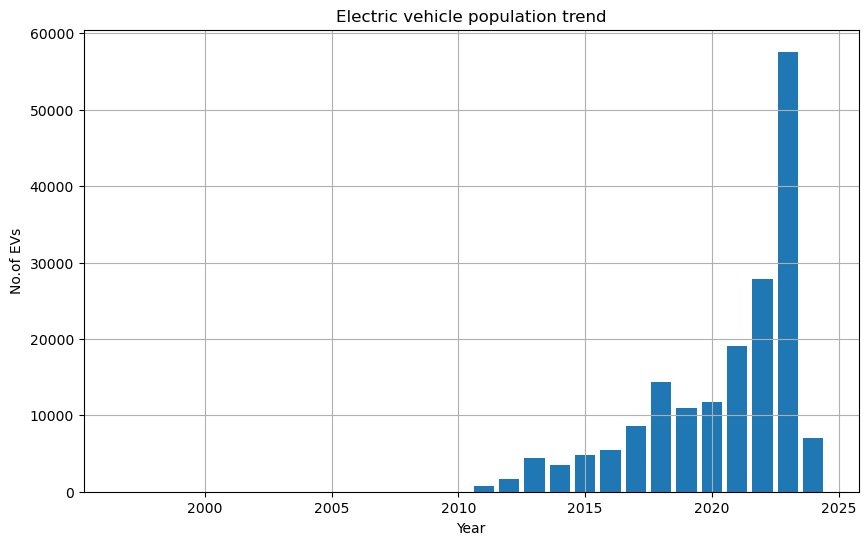

In [39]:
plt.figure(figsize= (10,6))
df_grouped = df.groupby("Model Year").size()

plt.bar(df_grouped.index, df_grouped.values)
plt.xlabel("Year")
plt.ylabel("No.of EVs")
plt.title("Electric vehicle population trend")
plt.grid(True)
plt.show()

In [35]:
df_grouped.values

array([    1,     1,     5,     7,     2,     1,    20,    23,   775,
        1618,  4409,  3509,  4844,  5483,  8562, 14323, 10940, 11768,
       19132, 27776, 57587,  7080], dtype=int64)

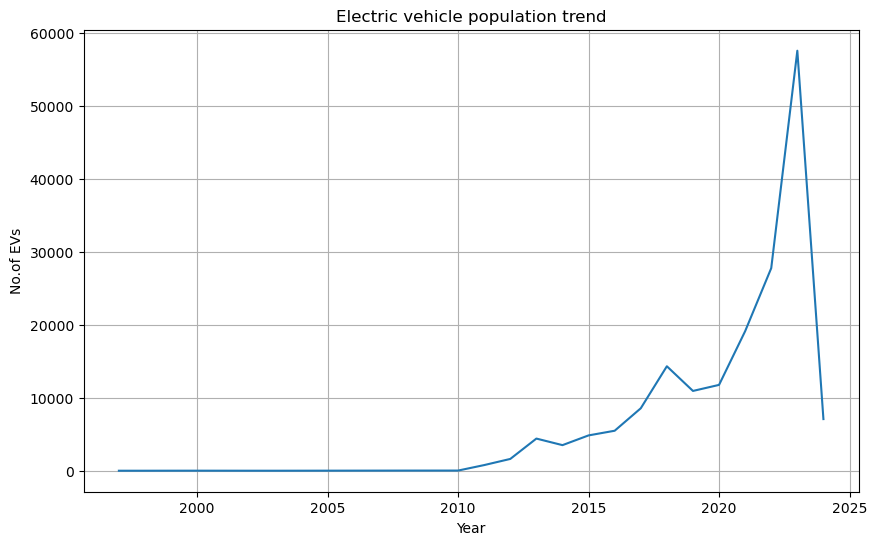

In [40]:
plt.figure(figsize= (10,6))
df_grouped = df.groupby("Model Year").size()

plt.plot(df_grouped.index, df_grouped.values)
plt.xlabel("Year")
plt.ylabel("No.of EVs")
plt.title("Electric vehicle population trend")
plt.grid(True)
plt.show()

In [16]:
geo_data = pd.read_excel("awesome-chocolates-data.xlsx", sheet_name = "geo" )
sales_data = pd.read_excel("awesome-chocolates-data.xlsx", sheet_name = "sales" )
people_data = pd.read_excel("awesome-chocolates-data.xlsx", sheet_name = "people" )
products_data = pd.read_excel("awesome-chocolates-data.xlsx", sheet_name = "products" )

geo_data.head()

,GeoID,Geo,Region
0,G1,India,APAC
1,G2,USA,Americas
2,G3,Canada,Americas
3,G4,New Zealand,APAC
4,G5,Australia,APAC


In [17]:
sales_data.head()

,SPID,GeoID,PID,SaleDate,Amount,Customers,Boxes
0,SP01,G4,P04,2021-01-01,8414,276,495
1,SP02,G3,P14,2021-01-01,532,317,54
2,SP12,G2,P08,2021-01-01,5376,178,269
3,SP01,G4,P15,2021-01-01,259,32,22
4,SP19,G2,P18,2021-01-01,5530,4,179


In [18]:
people_data.head()

,Salesperson,SPID,Team,Location
0,Barr Faughny,SP01,Yummies,Hyderabad
1,Dennison Crosswaite,SP02,Yummies,Hyderabad
2,Gunar Cockshoot,SP03,Yummies,Hyderabad
3,Wilone O'Kielt,SP04,Delish,Hyderabad
4,Gigi Bohling,SP05,Delish,Hyderabad


In [19]:
products_data.head()

,PID,Product,Category,Size,Cost_per_box
0,P01,Milk Bars,Bars,LARGE,1.52
1,P02,50% Dark Bites,Bites,LARGE,2.57
2,P03,Almond Choco,Bars,LARGE,9.60
3,P04,Raspberry Choco,Bars,LARGE,4.09
4,P05,Mint Chip Choco,Bars,LARGE,1.54


In [20]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617 entries, 0 to 7616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SPID       7617 non-null   object        
 1   GeoID      7617 non-null   object        
 2   PID        7617 non-null   object        
 3   SaleDate   7617 non-null   datetime64[ns]
 4   Amount     7617 non-null   int64         
 5   Customers  7617 non-null   int64         
 6   Boxes      7617 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 416.7+ KB


In [27]:
sales_data["PID"].unique()

array(['P04', 'P14', 'P08', 'P15', 'P18', 'P13', 'P16', 'P17', 'P01',
       'P05', 'P09', 'P06', 'P11', 'P10', 'P07', 'P22', 'P21', 'P12',
       'P02', 'P19', 'P03', 'P20'], dtype=object)

In [21]:
## Clean the data (e.g., handle missing values, convert data types):

sales_data.fillna(value = 0, inplace = True)

sales_data["SaleDate"] = pd.to_datetime(sales_data["SaleDate"])
sales_data.head()

,SPID,GeoID,PID,SaleDate,Amount,Customers,Boxes
0,SP01,G4,P04,2021-01-01,8414,276,495
1,SP02,G3,P14,2021-01-01,532,317,54
2,SP12,G2,P08,2021-01-01,5376,178,269
3,SP01,G4,P15,2021-01-01,259,32,22
4,SP19,G2,P18,2021-01-01,5530,4,179


In [23]:
## Calculate the total sales for each chocolate category:

Grouped_data = sales_data.groupby("SPID")["Amount"].sum()
Grouped_data.head()

SPID
SP01    1794940
SP02    1802150
SP03    1899436
SP04    1914157
SP05    1711066
Name: Amount, dtype: int64

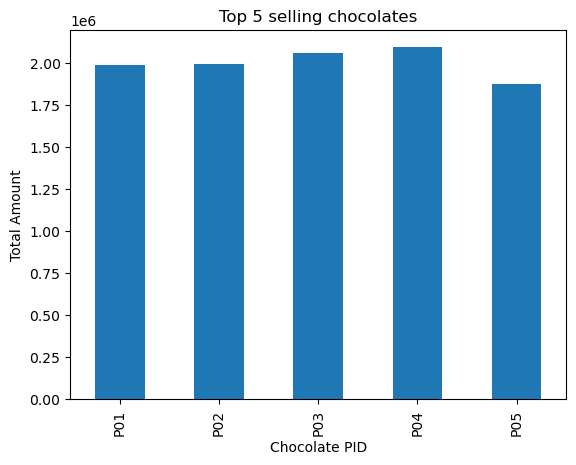

In [28]:
###Visualize the data (e.g., create a bar chart to show the top 5 selling chocolates): 

top_selling_chocolate = sales_data.groupby("PID")["Amount"].sum().head(5)
top_selling_chocolate.plot(kind = "bar")
plt.xlabel("Chocolate PID")
plt.ylabel("Total Amount")
plt.title("Top 5 selling chocolates")
plt.show()

In [2]:
sales_data.shape

(7617, 7)

In [4]:
sales_data.dtypes

SPID                 object
GeoID                object
PID                  object
SaleDate     datetime64[ns]
Amount                int64
Customers             int64
Boxes                 int64
dtype: object

In [6]:
sales_data.dropna(subset = ["Customers"] , inplace = True)
sales_data.head()

,SPID,GeoID,PID,SaleDate,Amount,Customers,Boxes
0,SP01,G4,P04,2021-01-01,8414,276,495
1,SP02,G3,P14,2021-01-01,532,317,54
2,SP12,G2,P08,2021-01-01,5376,178,269
3,SP01,G4,P15,2021-01-01,259,32,22
4,SP19,G2,P18,2021-01-01,5530,4,179


In [10]:
cus_and_Amount = sales_data[["Customers", "Amount"]]
cus_and_Amount.head()

,Customers,Amount
0,276,8414
1,317,532
2,178,5376
3,32,259
4,4,5530


In [11]:
fruits = ["apple", "banana", "orange"]
print("My favorite fruits are:", fruits)

My favorite fruits are: ['apple', 'banana', 'orange']


In [30]:
## Create a Data frame

data = pd.DataFrame({"C.Id":[1,2,3,4,5], "Product": ["shirt", "Pant", "Jeans", "Shorts", "Boxer"], 
                           "Price":[23, 78, 65, 78, 90], "Age":[15,12, 12,34, 22]})
data

,C.Id,Product,Price,Age
0,1,shirt,23,15
1,2,Pant,78,12
2,3,Jeans,65,12
3,4,Shorts,78,34
4,5,Boxer,90,22


In [31]:
data.isnull().sum()

C.Id       0
Product    0
Price      0
Age        0
dtype: int64

In [32]:
data["Age"].fillna(data["Age"].mean())
data

,C.Id,Product,Price,Age
0,1,shirt,23,15
1,2,Pant,78,12
2,3,Jeans,65,12
3,4,Shorts,78,34
4,5,Boxer,90,22


In [33]:
data.describe()

,C.Id,Price,Age
count,5.000000,5.000000,5.000000
mean,3.000000,66.800000,19.000000
std,1.581139,26.032672,9.327379
min,1.000000,23.000000,12.000000
25%,2.000000,65.000000,12.000000
50%,3.000000,78.000000,15.000000
75%,4.000000,78.000000,22.000000
max,5.000000,90.000000,34.000000


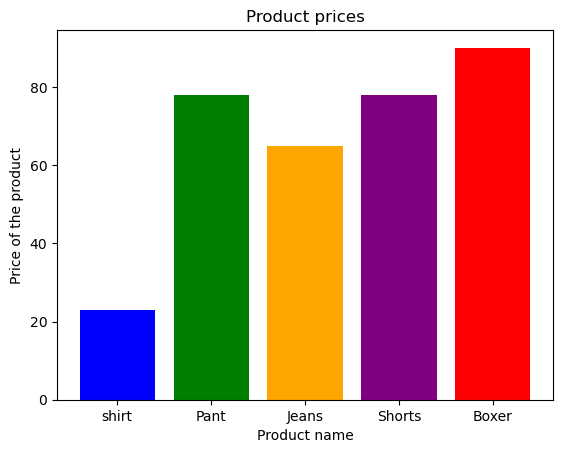

In [44]:
colors = ['blue', 'green', 'orange', 'purple', 'red']


plt.bar(data["Product"], data["Price"], color  = colors)
plt.xlabel("Product name")
plt.ylabel("Price of the product")
plt.title("Product prices")
plt.show()

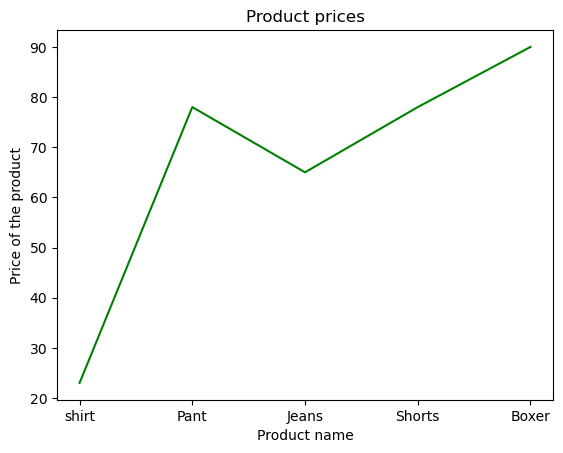

In [41]:
plt.plot(data["Product"], data["Price"], color = "green")
plt.xlabel("Product name")
plt.ylabel("Price of the product")
plt.title("Product prices")
plt.show()

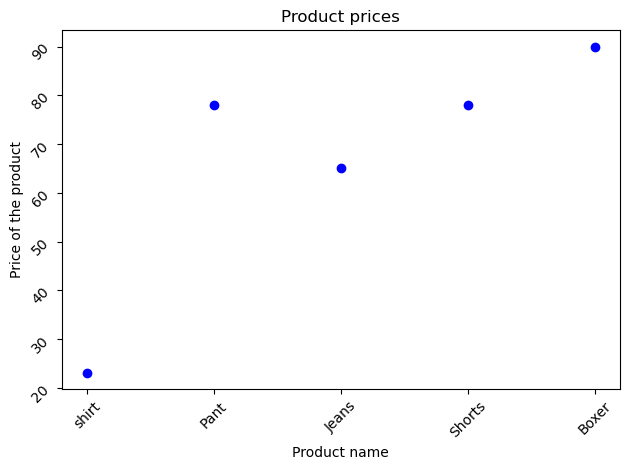

In [49]:
plt.scatter(data["Product"], data["Price"], color = "blue")
plt.xlabel("Product name")
plt.ylabel("Price of the product")
plt.title("Product prices")
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

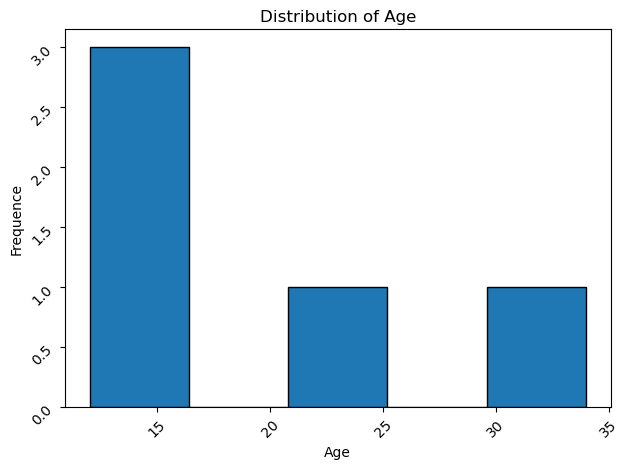

In [50]:
plt.hist(data["Age"], bins= 5 , edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Frequence")
plt.title("Distribution of Age")
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

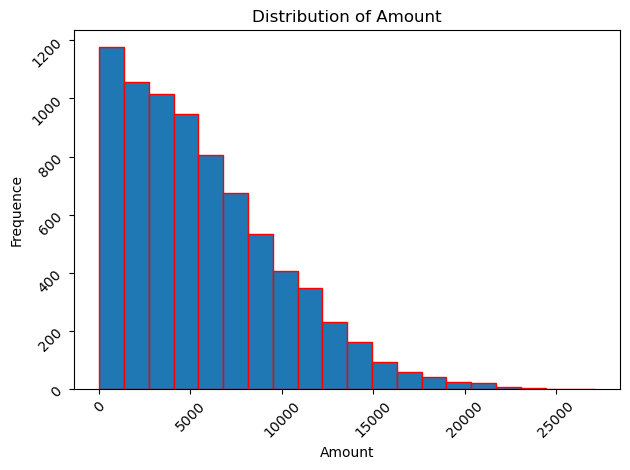

In [54]:
plt.hist(sales_data["Amount"], bins= 20 , edgecolor = "red")
plt.xlabel("Amount")
plt.ylabel("Frequence")
plt.title("Distribution of Amount")
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [57]:
data = data[data["Price"] > 50]

data

,C.Id,Product,Price,Age
1,2,Pant,78,12
2,3,Jeans,65,12
3,4,Shorts,78,34
4,5,Boxer,90,22


In [61]:
grouped_data  = sales_data.groupby("PID")["Amount"].mean().round(1)
grouped_data

PID
P01    5650.8
P02    5945.8
P03    5907.0
P04    6023.8
P05    5441.1
P06    5653.1
P07    5693.7
P08    5763.7
P09    5505.0
P10    5860.9
P11    5950.7
P12    5801.4
P13    5596.2
P14    5420.1
P15    5574.8
P16    5811.8
P17    5727.7
P18    5566.8
P19    5742.7
P20    5689.4
P21    5894.5
P22    5611.4
Name: Amount, dtype: float64

In [1]:
#Import libraries and create sample data:

import numpy as np

temperature = np.array([10,45,23,45,36,25,27,28,34,23,22,26])

In [3]:
#Calculate average temperature:
Avg_temp = np.mean(temperature)
print("Average temperature is ",Avg_temp.round(2), "Celsius")

Average temperature is  28.67 Celsius


In [6]:
#Find the hottest day:

Hottest_day  = np.argmax(temperature)+1
Hottest_temp = temperature[Hottest_day - 1]

print(f"Hottest day {Hottest_day} with Hottest temperature is {Hottest_temp} celsius")

Hottest day 2 with Hottest temperature is 45 celsius


In [11]:
data = pd.DataFrame({
  'Customer Name': ['Alice', 'Bob', 'Charlie', 'David'],
  'City': ['New York', 'Los Angeles', 'Chicago', 'Seattle'],
  'Purchase Amount': [100.50, 250.75, 125.25, 78.00]
})
data.head()

,Customer Name,City,Purchase Amount
0,Alice,New York,100.50
1,Bob,Los Angeles,250.75
2,Charlie,Chicago,125.25
3,David,Seattle,78.00


In [15]:
#Sort by purchase amount:

Sorted_data = data.sort_values(by = "Purchase Amount" , ascending = False)

Sorted_data.head()

,Customer Name,City,Purchase Amount
1,Bob,Los Angeles,250.75
2,Charlie,Chicago,125.25
0,Alice,New York,100.50
3,David,Seattle,78.00


In [16]:
#Filter data by city:
filtered_data = data[data["City"]=="New York"]
filtered_data

,Customer Name,City,Purchase Amount
0,Alice,New York,100.5


In [22]:
data = pd.DataFrame({
  'Product ID': [123, 456, 789, None],  # Include a None value for Product ID
  'Product Name': ['Shirt', 'Hat', 'Pants', 'Invalid Name'],
  'Price': ['$29.99', 39.95, 55.00, 'Not a number']  # Include a non-numeric price
})
data.head()

,Product ID,Product Name,Price
0,123.0,Shirt,$29.99
1,456.0,Hat,39.95
2,789.0,Pants,55.0
3,NaN,Invalid Name,Not a number


In [23]:
# Handle missing values:
data["Product ID"] = data["Product ID"].fillna(0)
data.head()

,Product ID,Product Name,Price
0,123.0,Shirt,$29.99
1,456.0,Hat,39.95
2,789.0,Pants,55.0
3,0.0,Invalid Name,Not a number


In [26]:
data["Price"] = pd.to_numeric(data["Price"], errors  = "coerce")
data.head()

,Product ID,Product Name,Price
0,123.0,Shirt,NaN
1,456.0,Hat,39.95
2,789.0,Pants,55.00
3,0.0,Invalid Name,NaN


In [27]:
#Remove rows with invalid data:

Cleaned_data = data.dropna (subset = ["Product Name", "Price"])
Cleaned_data.head()

,Product ID,Product Name,Price
1,456.0,Hat,39.95
2,789.0,Pants,55.00


In [2]:
# Working with Text Data

In [3]:
import nltk
from nltk.corpus import stopwords

In [4]:
text ="This product is amazing! It works really well and is very affordable. I highly recommend it."

In [5]:
tokens = nltk.word_tokenize(text)

In [6]:
lower_tokens = [token.lower() for token in tokens]

In [7]:
stopwords = stopwords.words("english")

In [8]:
filtered_tokens = [token for token in lower_tokens if token not in stopwords]

In [9]:
print(filtered_tokens)

['product', 'amazing', '!', 'works', 'really', 'well', 'affordable', '.', 'highly', 'recommend', '.']


In [10]:
# EDA

data = pd.DataFrame({
  'Department': ['Marketing', 'Sales', 'Engineering', 'Marketing', 'Sales'],
  'Salary': [80000, 95000, 110000, 75000, 100000]
})

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='GeoID', ylabel='Amount'>

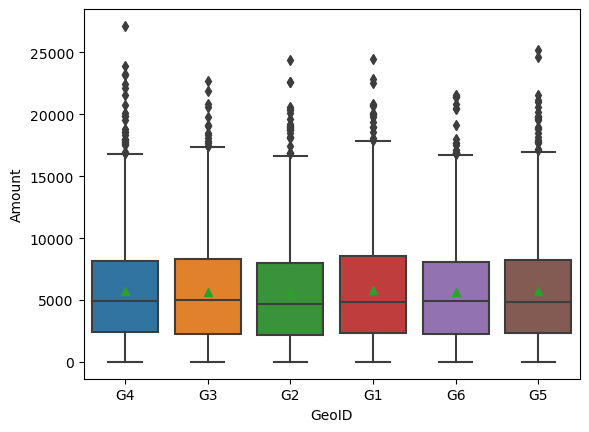

In [14]:
sns.boxplot( x= "GeoID" , y= "Amount" , showmeans = True ,  data = sales_data)

In [12]:
sales_data.columns

Index(['SPID', 'GeoID', 'PID', 'SaleDate', 'Amount', 'Customers', 'Boxes'], dtype='object')

In [15]:
# Web Scraping with Beautiful Soup

In [18]:
!pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable


In [19]:
import requests

In [20]:
from bs4 import BeautifulSoup

In [24]:
url = "https://www.amazon.in/s?k=shoes&ref=nb_sb_noss"

In [25]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [26]:
# This is a simplified example, you'll need to adjust selectors based on the website's HTML structure
product_elements = soup.find_all('div', class_='product-item')  # Find elements containing product information
prices = []
for element in product_elements:
  price_element = element.find('span', class_='price')  # Find the element containing the price
  if price_element:
    price_text = price_element.text.strip()  # Extract the price text and remove whitespace
    prices.append(price_text)

print(prices)

[]


In [30]:
data = pd.DataFrame({
  'Product': ['A', 'B', 'A', 'C', 'B', 'A'],
  'Quantity': [2, 1, 3, 1, 4, 5],
  'Price': [10, 15, 10, 20, 15, 10]
})

In [36]:
grouped_data = data.groupby('Product').agg({"Quantity" : "sum" , "Price" : "mean"})
grouped_data

,Quantity,Price
Product,,
A,10,10.0
B,5,15.0
C,1,20.0


In [2]:
data = pd.DataFrame({
  'Customer ID': [1, 2, 3, 4],
  'Purchase Date': ['2024-01-10', '2024-02-15', '2024-01-20', '2024-02-05']
})

In [3]:
data["Purchase Date 1"] = pd.to_datetime(data["Purchase Date"])
print(data)

   Customer ID Purchase Date Purchase Date 1
0            1    2024-01-10      2024-01-10
1            2    2024-02-15      2024-02-15
2            3    2024-01-20      2024-01-20
3            4    2024-02-05      2024-02-05


In [4]:
data.dtypes

Customer ID                 int64
Purchase Date              object
Purchase Date 1    datetime64[ns]
dtype: object

In [11]:
data["month"] = data["Purchase Date 1"].dt.month_name()
data["Year"] = data["Purchase Date 1"].dt.year
data["day"] = data["Purchase Date 1"].dt.day
data["day_name"] = data["Purchase Date 1"].dt.day_name()
data["dayofweek"] = data["Purchase Date 1"].dt.dayofweek
data

,Customer ID,Purchase Date,Purchase Date 1,month,Year,dayofweek,day,day_name
0,1,2024-01-10,2024-01-10,January,2024,2,10,Wednesday
1,2,2024-02-15,2024-02-15,February,2024,3,15,Thursday
2,3,2024-01-20,2024-01-20,January,2024,5,20,Saturday
3,4,2024-02-05,2024-02-05,February,2024,0,5,Monday


In [14]:
print(geo_data.head())
print(sales_data.head())
print(people_data.head())
print(products_data.head())

  GeoID          Geo    Region
0    G1        India      APAC
1    G2          USA  Americas
2    G3       Canada  Americas
3    G4  New Zealand      APAC
4    G5    Australia      APAC
   SPID GeoID  PID   SaleDate  Amount  Customers  Boxes
0  SP01    G4  P04 2021-01-01    8414        276    495
1  SP02    G3  P14 2021-01-01     532        317     54
2  SP12    G2  P08 2021-01-01    5376        178    269
3  SP01    G4  P15 2021-01-01     259         32     22
4  SP19    G2  P18 2021-01-01    5530          4    179
           Salesperson  SPID     Team   Location
0         Barr Faughny  SP01  Yummies  Hyderabad
1  Dennison Crosswaite  SP02  Yummies  Hyderabad
2      Gunar Cockshoot  SP03  Yummies  Hyderabad
3       Wilone O'Kielt  SP04   Delish  Hyderabad
4         Gigi Bohling  SP05   Delish  Hyderabad
   PID          Product Category   Size  Cost_per_box
0  P01        Milk Bars     Bars  LARGE          1.52
1  P02   50% Dark Bites    Bites  LARGE          2.57
2  P03     Almond Choc

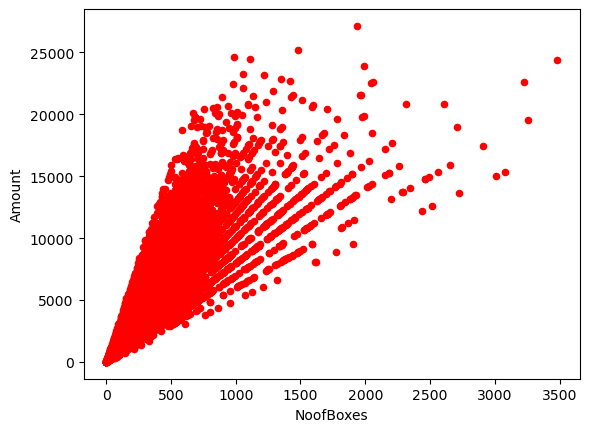

In [21]:
sales_data.plot.scatter(x = "Boxes" , y = "Amount" , color = "red")
plt.xlabel("NoofBoxes")
plt.ylabel("Amount")
plt.show()

In [48]:
import pandas as pd

data = pd.DataFrame({
  'Customer ID': [1, 2, 3, 4],
  'Product': ['Shirt', 'Hat', 'Pants', 'Jacket'],
  'Price': [25.99, 19.95, 49.50, 99.99],
  'Age': [30,np.nan, 28, 40]
})

In [49]:
data.isnull().sum()

Customer ID    0
Product        0
Price          0
Age            1
dtype: int64

In [50]:
data["Age"].fillna(data["Age"].mean())

0    30.000000
1    32.666667
2    28.000000
3    40.000000
Name: Age, dtype: float64

In [51]:
data.dtypes

Customer ID      int64
Product         object
Price          float64
Age            float64
dtype: object

In [67]:
data.describe().round(2)

,Customer ID,Price,Age
count,4.00,4.00,3.00
mean,2.50,48.86,32.67
std,1.29,36.39,6.43
min,1.00,19.95,28.00
25%,1.75,24.48,29.00
50%,2.50,37.74,30.00
75%,3.25,62.12,35.00
max,4.00,99.99,40.00


In [68]:
data_filtered = data[data["Age"] > 25]
data_filtered

,Customer ID,Product,Price,Age
0,1,Shirt,25.99,30.0
2,3,Pants,49.50,28.0
3,4,Jacket,99.99,40.0


In [69]:
print(sales_data.head())


   SPID GeoID  PID   SaleDate  Amount  Customers  Boxes
0  SP01    G4  P04 2021-01-01    8414        276    495
1  SP02    G3  P14 2021-01-01     532        317     54
2  SP12    G2  P08 2021-01-01    5376        178    269
3  SP01    G4  P15 2021-01-01     259         32     22
4  SP19    G2  P18 2021-01-01    5530          4    179


In [70]:
average_Sales = sales_data.groupby("PID")["Amount"].mean().reset_index(name="avg_sales").round(2)
average_Sales.head()

,PID,avg_sales
0,P01,5650.79
1,P02,5945.78
2,P03,5906.97
3,P04,6023.75
4,P05,5441.14


In [73]:
Total_Sales = sales_data.groupby("PID")["Amount"].sum().reset_index(name="Total_sales")
Total_Sales.head()

,PID,Total_sales
0,P01,1989078
1,P02,1991836
2,P03,2055627
3,P04,2090242
4,P05,1871751


<BarContainer object of 22 artists>

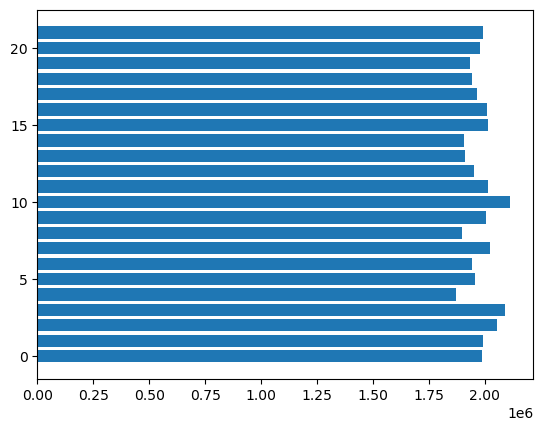

In [79]:
plt.barh(Total_Sales["Total_sales"].index, Total_Sales["Total_sales"].values)

([<matplotlib.patches.Wedge at 0x24b34dd4f40>,
 [Text(1.089071121194644, 0.1546741509750136, 'P01'),
  Text(0.999584220768955, 0.4591637895018737, 'P02'),
  Text(0.8222340453917646, 0.7307059426326666, 'P03'),
  Text(0.5715766287316639, 0.9398404957692267, 'P04'),
  Text(0.2829611542723615, 1.0629830596829157, 'P05'),
  Text(-0.018503534746488772, 1.0998443613538627, 'P06'),
  Text(-0.32519094659950576, 1.0508334065158556, 'P07'),
  Text(-0.6084878252646512, 0.9163746867437443, 'P08'),
  Text(-0.8389896490920349, 0.7114045042846048, 'P09'),
  Text(-1.0046101270979986, 0.4480608134306583, 'P10'),
  Text(-1.0914676946388495, 0.13674162336229387, 'P11'),
  Text(-1.0843702674522882, -0.18477316651898718, 'P12'),
  Text(-0.988891685105418, -0.48176055788053773, 'P13'),
  Text(-0.8208861245034612, -0.7322198922439133, 'P14'),
  Text(-0.5916693629185393, -0.9273226865463662, 'P15'),
  Text(-0.30783445336864285, -1.0560482703547358, 'P16'),
  Text(0.004909824673384615, -1.0999890425007317, 'P1

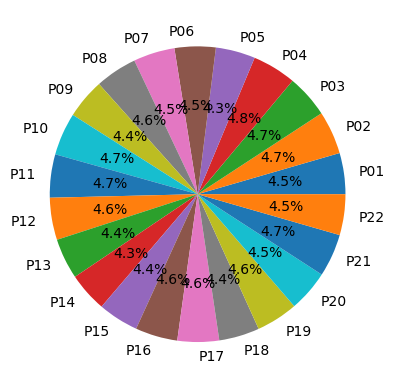

In [82]:
plt.pie(average_Sales["avg_sales"].values, labels = average_Sales["PID"].values , autopct = "%1.1f%%")

In [3]:
data = pd.DataFrame({
  'Model Year': [2010, 2012, 2015, 2017, 2018],
  'Miles Driven': [50000, 65000, 40000, 30000, 25000]
})

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


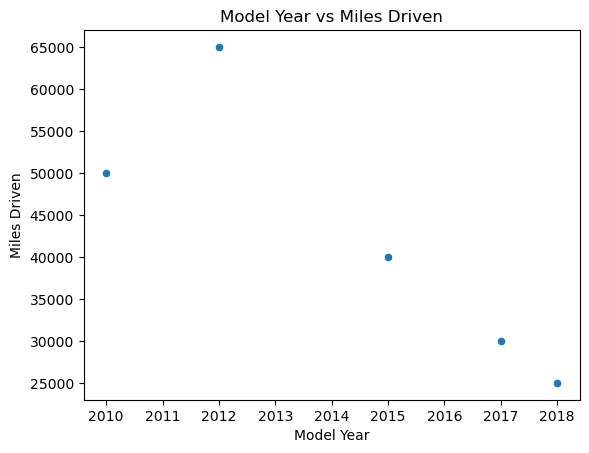

In [4]:
sns.scatterplot(x= "Model Year" , y = "Miles Driven" , data = data)
plt.title("Model Year vs Miles Driven")
plt.show()

In [5]:
print(geo_data.head())
print(sales_data.head())
print(people_data.head())
print(products_data.head())

  GeoID          Geo    Region
0    G1        India      APAC
1    G2          USA  Americas
2    G3       Canada  Americas
3    G4  New Zealand      APAC
4    G5    Australia      APAC
   SPID GeoID  PID   SaleDate  Amount  Customers  Boxes
0  SP01    G4  P04 2021-01-01    8414        276    495
1  SP02    G3  P14 2021-01-01     532        317     54
2  SP12    G2  P08 2021-01-01    5376        178    269
3  SP01    G4  P15 2021-01-01     259         32     22
4  SP19    G2  P18 2021-01-01    5530          4    179
           Salesperson  SPID     Team   Location
0         Barr Faughny  SP01  Yummies  Hyderabad
1  Dennison Crosswaite  SP02  Yummies  Hyderabad
2      Gunar Cockshoot  SP03  Yummies  Hyderabad
3       Wilone O'Kielt  SP04   Delish  Hyderabad
4         Gigi Bohling  SP05   Delish  Hyderabad
   PID          Product Category   Size  Cost_per_box
0  P01        Milk Bars     Bars  LARGE          1.52
1  P02   50% Dark Bites    Bites  LARGE          2.57
2  P03     Almond Choc